In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
from nltk import word_tokenize
from collections import Counter

from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()


from nltk.corpus import stopwords
stopword_list = stopwords.words('english')

import string
for punct_mark in string.punctuation:
    stopword_list.append(punct_mark)

In [11]:
df = pd.read_csv('banned_book_data_combined_lists.csv')
print(df.shape)
df.head()

print(f'Earliest year in this data set: {int(df["year"].min())}')
print(f'Latest year in this data set: {int(df["year"].max())}')

## Analysis is limited to data after 1990
df = df[ df['year'] > 1990]
df['year'] = df['year'].astype('int')

(55278, 8)
Earliest year in this data set: 1815
Latest year in this data set: 2022


## Annual number of bans

In [30]:
books_per_year = df.groupby('year')['publication'].count().to_dict()

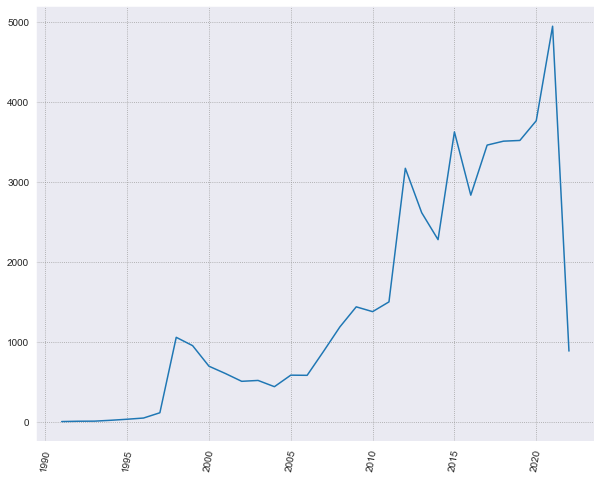

In [31]:
x_axis = list(books_per_year.keys())
y_axis = list(books_per_year.values())

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

fig = plt.figure( figsize=( 10 , 8 ) )


ax = sns.lineplot( x=x_axis , y=y_axis )
plt.xticks(rotation= 80)
plt.show()

## Motivations

In [55]:
word_freq = Counter()

for i,row in df.iterrows():
    reason = str(row['reason']).lower()
    words = word_tokenize(str(reason))
    words = [word for word in words if word not in stopword_list]
    words = [word for word in words if not(re.search(r'\d+^$',word))]
    words = [lemmatiser.lemmatize(word) for word in words]
    word_freq.update(words)

In [56]:
print(f"{len(word_freq)} words.") 

8267 words.


In [57]:
## Create the lexicon

with open('lexicon.csv','w',encoding='utf-8') as out:
    out.write('word,category\n')
    for word,count in word_freq.most_common():
        out.write(f'{word},\n')

In [72]:
lexicon = pd.read_excel('lexicon.xlsx')
word_category = dict()

for i,row in lexicon.iterrows():
    if not(pd.isna(row['category'])):
        word_category[row['word']] = row['category']

In [73]:
categories = dict()

for i,row in df.iterrows():
    category = ''
    reason = str(row['reason']).lower()
    words = word_tokenize(str(reason))
    words = [word for word in words if word not in stopword_list]
    words = [word for word in words if not(re.search(r'\d+^$',word))]
    words = [lemmatiser.lemmatize(word) for word in words]
    for word in words:
        if word in word_category:
            category = word_category[word]
            categories[reason]=category

In [80]:
categories_list = ['sexual inappropriateness',
                'explicit material','rape',
           'nudity','security', 'violence','drugs',
                 'racism','religion']

In [110]:
category_count = dict()

for c in categories_list:

    count = 0
    #print(c.title()+'\n')

    for motivation in categories:
        if categories[motivation] == c:
            #print(motivation)
            count+=1
    category_count[c] = category_count.get(c,0)+count

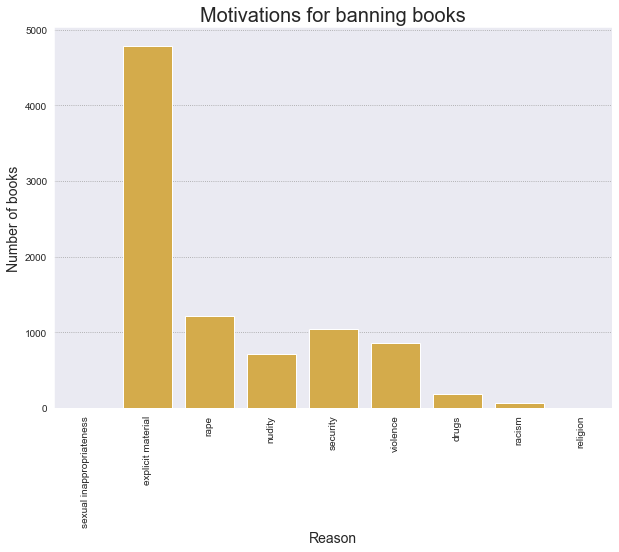

In [88]:
x_axis = list(category_count.keys())
y_axis = list(category_count.values())

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure( figsize=( 10 , 7 ) )

graph = sns.barplot( x=x_axis, y=y_axis , color = '#ebb434')

graph.set_title('Motivations for banning books' , size = 20) 
graph.set_xlabel('Reason' , size = 14) 
graph.set_ylabel('Number of books' , size = 14 )

plt.xticks(rotation= 90)
# The next line places the legend outside out the plot


plt.show()

In [89]:
print(f'A total of {sum(category_count.values())} reasons have been classified')

A total of 8863 reasons have been classified


In [109]:
with open('Reasons_Categories.tsv','w',encoding='utf-8') as out:
    for i,row in df.iterrows():
        if not(pd.isna(row['reason'])):

            cat = ''
            if row['reason'] in categories:
                cat = categories[row['reason']]

            out.write(f"{row['reason']}\t{cat}\n")


## Titles and genres

In [12]:
for i,row in df.drop_duplicates(subset=['publication']).iterrows():
    print(row['publication'])
    if not pd.isna(row['author']):
        print(row['author'])
        print(row['reason'])
    print('')

[ARABIC LANGUAGE CHARACTERS]. 

[ARABIC LANGUAGE CHARACTERS]. TAJWEED QURAN.

[KOREAN LANGUAGE CHARACTERS] HOLY SPIRIT LOVE. 

[KOREAN LANGUAGE CHARACTERS].

[KOREAN LANGUAGE CHARACTERS]. 

[SERBIAN LANGUAGE CHARACTERS]. KAPATHOPTHE.

1 HOUR TRADE. 

10 DAI THOU TUONG TRUNG QUAC. 

10 DAI VAN HAO TRUNG QUOC. PUBLISHER NHA XUAT BAN VAN HOC.

10 POWER REPORTS. SUPPLEMENT TO MEN'S HEALTH.

10 WORST PSYCHOPATHS: THE MOST DEPRAVED KILLERS IN HISTORY. 

100 ANIMALS ADULT COLORING BOOK. 

100 BEST SOLITAIRE GAMES. 

100 BEST STOCKS TO BUY IN 2020. 

100 BULLETS. BOOK II. 

100 CARD GAMES FOR ALL THE FAMILY. 

100 COOL MUSHROOMS. 

100 DEADLY SKILLS SURVIVAL EDITION. 

100 EROTIC ILLUSTRATIONS. 

100 HOT SEX POSITIONS. 

100 NO- EQUIPMENT WORKOUTS. 

100 ORNAMENTAL ALPHABETS. 

100 SIMPLE PAPER FLOWERS. 

100 TATTOOS: ADULT COLORING BOOK. 

100 WAYS TO WIN A TEN-SPOT. 

1000 BIKER TATTOOS. 

1000 FONTS: AN ILLUSTRATED GUIDE TO FINDING THE RIGHT TYPEFACE. 

1000 IDEAS FOR GRAFFITI AND STREET AR

BLACK AND WILD. VOL. 14 NO. 01.

BLACK AND WILD. VOL. 14 NO. 06.

BLACK AUGUST: MOVE 9. 

BLACK BELT FITNESS FOR LIFE: A7--WEEK TO PLAN ACHIEVE LIFELONG WELLNESS. 

BLACK BELT, KRAV MAGA: ELITE TECHNIQUES OF THE WORLD'S MOST POWERFUL COMBAT SYSTEM. 

BLACK BELT. 2012/08.

BLACK BELT. 2013/04-2013/05.

BLACK BELT. 2014/04-2014/05. VOL. 52 NO. 03.

BLACK BELT. 2015/04-2015/05. VOL. 53 NO. 03.

BLACK BELT. 2015/06-2015/07.

BLACK BOOTY CALL. VOL. 02 NO. 01.

BLACK BOOTY. 2012. VOL. 53.

BLACK BOOTY. 2013. DISPLAY UNTIL 2013/05/17.

BLACK BOOTY. 2013. VOL. 68.

BLACK BOOTY. 2013. VOL. 71.

BLACK CAESAR: THE RISE AND DISAPPEARANCE OF FRANK MATTHEWS, KINGPIN. 

BLACK CRUSADE CORE RULEBOOK. FANTASY FLIGHT GAMES.

BLACK DOLLS. 2014. VO. 87.

BLACK DOLLS. 2014. VOL. 76.

BLACK DOLLS. 2014. VOL. 79.

BLACK DOLLS. NO. 247.

BLACK HAND: THE STORY OF RENE “BOXER” ENRIQUEZ AND HIS LIFE IN THE MEXICAN MAFIA. 

BLACK HEART: THE CURSE WORKERS. 

BLACK INK TATTOO. ISSUE 001.

BLACK INK TATTOO. ISSUE 002


CON. 

CONCISE 33 STRATEGIES OF WAR. 

CONCISE 48 LAWS OF POWER. NEW EDITION. 

CONCISE ART OF SEDUCTION. 

CONDITIONAL ACCEPTANCE FOR VALUE FOR PROOF OF CLAIM BOOK, 

CONDITIONS OF PARADISE: AZURE DREAMS. 

CONF!DENT CODING: HOW TO WRITE CODE AND FUTUREPROOF YOUR CAREER. 

CONFESSIONS OF A CARTEL HIT MAN. 

CONFESSIONS OF A PORN STAR. 

CONFESSIONS OF A SINNER. 

CONFESSIONS OF THE HUNDRED HOTTEST PORN STARS. 

CONFIGURING ADVANCED WINDOWS SERVER 2012 R2: SERVICES TRAINING GUIDE. 

CONNECT AND COLOR: CELTIC DESIGNS AN ADULT COLORING AND DOT-TO-DOT BOOK. 

CONSTANTINE PRIMA OFFICIAL GAME GUIDE COMPLETE DEMON INDEX. 

CONSULTING FOR DUMMIES. 2ND EDITION. 

CONSUMER REPORTS. 2021/06.

CONTACT HIGH. 

CONTEMPORARY EROTIC ART. 

CONTENT MARKETING HANDBOOK: HOW TO DOUBLE THE RESULTS OF YOUR MARKETING CAMPAIGNS. 

CONTINGENCY CANNIBALISM. SUPERHARDCORE SURVIVALISM'S DIRTY LITTLE SECRET. 

CONTRACT KILLER. 

CONTROL THE CONVERSATION. 

CONTROLLED AGGRESSION IN THEORY AND PRACTICE. 

CONVERSA


F.E.D.S. (FINALLY EVERY DIMENSION OF THE STREETS). VOL. 9. NO. 39.

F.E.D.S. VOL. 4 ISSUE 26.

F.T.T.P. (FIRE TO THE PRISONS). 2011/SPRING. NO. 11.

FABLES. BOOK 2: THE DELUXE EDITION. 

FACE. 

FACEBOOK: ALL-IN-ONE FOR DUMMIES. 

FACES OF AFRICA. 

FACING VIOLENCE. 

FAG PUNK.  NO. 12.

FAIRY SONG. VOL. 1.

FAIRY TAILS 2: A GALLERY GIRLS COLLECTION. EDITED 

FAITH. 2015/04 – 2015/06. VOL. 79. NO. 2.

FAITH. 2015/10-2015/12. VOL. 79. NO. 4.

FAITH. 2016/10-2016/12. VOL. 80. NO. 4.

FAITH. 2017/01-2017/03. VOL. 81. NO. 1.

FAITH. 2017/04-2017/06. VOL. 81. NO. 2.

FAITH. VOL. 80 NO. 3.

FAITH: COLOR THE WORDS OF GOD VOL 1. BOOK OF MORMON VERSES.

FAITHLESS II #5. 

FALLACY OF MILLENNIALISM. 

FALLEN PRIDE. 

FALLOUT 4. GOTY: GAME OF THE YEAR EDITION. 

FALLOUT 4: VAULT DWELLER'S SURVIVAL GUIDE. 

FAMILY AFFAIR: GREED, TREACHERY AND BETRAYAL IN THE CHICAGO MAFIA.  

FAMILY FAVORITES VARIETY PUZZLES. 2016/SPRING.

FAMILY FAVORITES VARIETY PUZZLES. NO. 59.

FAMILY HANDYMAN. 2014/02.

FAMIL

GEORGIA OUTDOOR NEWS. 2018/11

GEORGIA OUTDOORS NEWS. 2018/06.

GEORGIA OUTDOORS NEWS. 2018/10.

GERMANIC LANGUAGE OF 128 MILLION.

GERMOPHOBIA: DUMB DOCTORS, BOTCHED OPERATIONS AND ALL MANNER OF BAD MEDICINE. 

GET BACKERS NO 1. 

GET CODING: LEARN HTML, CSS, AND JAVASCRIPT AND BUILD A WEBSITE, APP, AND GAMES. 

GET OUT, GET RICH. 

GET RICH WITH TWITTER: HARNESS THE POWER OF THE TWITTERVERSE… 

GET THE TRUTH COMMENTARY. 

GET WISE! KNOWLEDGE IS POWER!! 

GET YOUR CAPTAIN'S LICENSE: THE COMPLETE STUDY GUIDE. 

GETTING AWAY WITH MURDER. 

GETTING AWAY WITH MURDER: A TRUE STORY. 

GETTING STARTED IN SIGNING. 

GETTING STARTED WITH MICROSOFT: VISUAL BASIC. NET VERSION 2003. 

GETTING TO THE YES: NEGOTIATING AGREEMENT WITHOUT GIVING IN. 

GETTING TOGETHER: HANDY-DANDY HOW TO HANDBOOK. 

GETTTING OFF. 

GHETTO BASTARD: THE BEGINNING. PREQUEL TO ANIMAL. 

GHETTO CRIMINOLOGY. 

GHOST RIGHTER'S WORDS FROM THE DARK SIDE. 

GHOSTMAN. THE TRUTH BEHIND THE CAPTURE OF JOAQUIN ‘EL CHAPO' GUZMAN. 



I LUCIFER: EXPLORING THE ARCHETYPE AND ORIGINS OF THE DEVIL. 

I PHONE FOR SENIORS FOR DUMMIES. 3RD EDITION. 

I SPY: HOW TO BE YOUR OWN PRIVATE INVESTIGATOR. 

I WILL FIND YOU. 

I'ADORE. ISSUE 008

I'ADORE. ISSUE 009.

I'ADORE. ISSUE 16.

ICAN NEWSLETTER. 2011/11-2011/12.

ICE MAN CONFESSIONS OF A MAFIA CONTRACT KILLER. 

ICE: A MEMOIR OF GANSTER LIFE AND REDEMPTION FROM SOUTH CENTRAL TO HOLLYWOOD. 

ICEMAN, THE TRUE STORY OF A COLD-BLOODED KILLER. 

ICONS. 

ICP BEHIND THE PAINT. 

ID: IDEAS AND DISCOVERIES. 2014/10.

ID: IDEAS AND DISCOVERIES. 2016/03.

ID: IDEAS AND DISCOVERIES. 2016/04.

ID: IDEAS AND DISCOVERIES. 2016/08.

ID: IDEAS AND DISCOVERIES. 2017/02.

ID: IDEAS AND DISCOVERIES. 2017/05.

ID: IDEAS AND DISCOVERIES. 2017/07.

ID: IDEAS AND DISCOVERIES. 2017/09.

ID: IDEAS AND DISCOVERIES. 2018/01.

ID: IDEAS AND DISCOVERIES. 2018/03.

ID: IDEAS AND DISCOVERIES. 2018/05.

ID: IDEAS AND DISCOVERIES. 2018/09

ID: IDEAS AND DISCOVERIES. 2018/11.

ID: IDEAS AND DISCOVERIES. 201


MANGA ARTIST'S COLORING BOOK GIRLS! 

MANGA CRASH COURSE. 

MANGA MANIA UNIVERSE. 

MANGA MANIA: BISHOUJO. 

MANGA: THE MONSTER BOOK OF MANGA FAIRIES AND MAGICAL CREATURES. 1ST EDITION. 

MANGA: THE MONSTER BOOK OF MANGA GIRLS. EDITED 

MANGA: THE MONSTER BOOK OF MANGA GOTHIC. 

MANGAMANIA GIRL POWER. 

MAN'S GUIDE TO WOMEN. 

MAN'S PLAYBOOK. 

MANSKILLS: HOW TO AVOID EMBARRASSING YOURSELF AND IMPRESS EVERYONE ELSE. 

MANSON: THE LIFE AND TIMES OF CHARLES MANSON. 

MANUAL FOR THE “FREEMAN”: “ALLODIAL AND PATENT LAND STATUS”. 

MANUAL OF FREE ENERGY DEVICES AND SYSTEMS. VOL. 2. 

MANUAL OF WIRE BENDING TECHNIQUES. 

MANUAL TO ONLINE PUBLIC RECORDS. 

MANY SHADES OF B D S M. 

MAORI TATTOOING. 

MAP IT! ATLAS OF BRAINY CHALLENGES. 

MARAS: GANG VIOLENCE AND SECURITY IN CENTRAL AMERICA. ED. 

MARATHON DON’T STOP: THE LIFE AND TIMES OF NIPSEY HUSSLE. 

MARC LAWRENCE'S BLACK BOOK 2012.

MARC LAWRENCE'S BLACK BOOK 2015. A GUIDE TO PICKING COLLEGE AND PRO FOOTBALL WINNERS.

MARC LAWRENCE'S B


ORIGAMI MAGIC. 

ORIGAMI MASTER CLASS; FLOWERS. 

ORIGAMI OMNIBUS: PAPER FOLDING FOR EVERYBODY. By KUNIHIKO KASAHARA.

ORIGAMI PAGE A DAY CALENDAR. 

ORIGAMI PAPER ANIMALS. 

ORIGAMI PAPER BOXES. 

ORIGAMI PAPER BRIGHT; SIX BRILLIANT COLORS. TUTTLE.

ORIGAMI TO ASTONISH AND AMUSE. 

ORIGAMI TOYS THAT TUMBLE, FLY, AND SPIN; 1ST EDITION. 

ORIGAMI WORLD, 40 FUN PAPER FOLDING PROJECTS. By DIDIER BOURSIN.

ORIGAMI. 

ORIGAMI. PAPER MEGA PACK. 

ORIGAMI: JAPANESE PAPER-FOLDING BOOK ONE. 

ORIGINAL GANGSTAS: TUPAC SHAKUR, DR. DRE, EAZY-E, ICE CUBE AND THE BIRTH OF WEST COAST RAP. 

ORIGINAL MIAMI BOYS. 

ORIGINAL PRIVACY CATALOG. 2012.

ORIGINAL PRIVACY CATALOG. 2013/2014. EDEN PRESS.

ORIGINAL PRIVACY CATALOG. 2015-2016. EDEN PRESS BOOKS & PUBLICATIONS.

ORIGINAL THEBAN WORKBOOK: LEARN TO READ AND WRITE THE WITCHES ALPHABET IN 27 DAYS OR LESS. 

ORLANDO WEEKLY. 2015/09/02-2015/09/08

ORLOG PRESS: GORMANUDE 2269 R.E. VOL. XIII. 1.

ORTHO'S ALL ABOUT WIRING BASICS. ALL NEW EDITION. 

ORTHO'S

PRISON LEGAL NEWS. 2018/01. VOL. 29. NO. 1.

PRISON LEGAL NEWS. 2018/02. VOL. 29. NO. 2

PRISON LEGAL NEWS. 2018/03. VOL. 29. NO. 3.

PRISON LEGAL NEWS. 2018/04.

PRISON LEGAL NEWS. 2018/05. VOL. 29. NO. 5.

PRISON LEGAL NEWS. 2018/06. VOL. 29. NO. 6.

PRISON LEGAL NEWS. 2018/07. VOL. 29. NO. 7.

PRISON LEGAL NEWS. 2018/08. VOL. 29. NO. 8.

PRISON LEGAL NEWS. 2018/09. VOL. 29. NO. 9.

PRISON LEGAL NEWS. 2018/10. VOL. 29 NO. 10

PRISON LEGAL NEWS. 2018/11. VOL. 29. NO. 11.

PRISON LEGAL NEWS. 2018/12. VOL. 29. NO. 12.

PRISON LEGAL NEWS. 2019/01. VOL. 30. NO. 1.

PRISON LEGAL NEWS. 2019/02. VOL. 30. NO. 2.

PRISON LEGAL NEWS. 2019/03. VOL. 30 NO. 3.

PRISON LEGAL NEWS. 2019/04. VOL. 30. NO. 4.

PRISON LEGAL NEWS. 2019/05. VOL. 30. NO. 5.

PRISON LEGAL NEWS. 2019/06. VOL. 30 NO. 6.

PRISON LEGAL NEWS. 2019/07. VOL. 30. NO.7.

PRISON LEGAL NEWS. 2019/08. VOL. 30. NO. 8.

PRISON LEGAL NEWS. 2019/09. VOL. 30. NO. 9.

PRISON LEGAL NEWS. 2019/10. VOL. 30. NO. 10.

PRISON LEGAL NEWS. 2019/11. 

SHOOTING TIMES. 2019/10.

SHOOTING TIMES. 2019/11.

SHOOTING TIMES. 2019/12- 2020/01.

SHOOTING TIMES. 2020/02. VOL. 61 ISSUE 1

SHOOTING TIMES. 2020/03.

SHOOTING TIMES. 2020/04.

SHOOTING TIMES. 2020/05.

SHOOTING TIMES. 2020/06.

SHOOTING TIMES. 2020/07.

SHOOTING TIMES. 2020/08.

SHOOTING TIMES. 2020/09.

SHOOTING TIMES. 2020/10.

SHOOTING TIMES: COMPLETE BOOK OF THE MODEL 1911.  2014.

SHORT EYES. 

SHORT SENTENCES: THE PRISONER EXPRESS BOOK REVIEW. 

SHORT TERM TRADING IN THE NEW STOCK MARKET. 

SHORTCUT TO FIXING COMPUTERS. 

SHORTCUTS AND ARTISTS' SECRETS. 

SHORTY GOT A THUG. 

SHOT CALLER. 

SHOTGUN IN YOUR FACE. 

SHOTS ON THE BRIDGE: POLICE VIOLENCE AND COVER-UP IN THE WAKE OF KATRINA. 

SHOW: THE ART OF SEXY. 2013/10-2013/11.

SHOWCARD ALPHABETS: 100 COMPLETE FONTS. 

SHRAPNEL: BOMB FRAGMENTS FOR THE MIND #3

SHRUNK MORE: FURTHER TALES OF MALE REDUCTION. 

SHRUNK: TALES OF WOMEN'S FAVORITE TOYS.

SHY GIRL/THICK: BEST OF BOTH WORLDS. VOL 1. (COMBINED ISSUE-SHY GIRL SPECIAL 


TRADITIONAL BOWHUNTER. 2021/02 - 2021/03.

TRADITIONAL BOWHUNTER. 2021/08 - 2021/09.

TRADITIONAL BOWYERS HANDBOOK. 

TRADITIONAL JU JITSU GROUNDWORK. 

TRADITIONAL MAGIC SPELLS FOR PROTECTION AND HEALING. 

TRADITIONAL TOOLMAKING. 

TRAILER LIFE. 2020/10.

TRAILERSTEADING. 

TRAIN LIKE A FIGHTER. 

TRAINING A SEARCH AND RESCUE DOG FOR WILDERNESS AIR SENT DETECTION. 

TRAINING AND CONDITIONING FOR JUDO. 

TRAINING BIRDS OF PREY. 

TRANQUIL TREES-ARTIST'S COLORING BOOK: 31 STRESS RELIEVING DESIGNS. 

TRANS AM & FIREBIRD RESTORATION 1970 1/2 - 1981. 

TRANSFER DESIGNS FOR EMBROIDERY. 

TRANSFORMATION. 2014. NO. 90.

TRANSFORMATION. 2014. NO. 91.

TRANSFORMATIVE WITCHCRAFT. 

TRANSFORMERS: THE ULTIMATE POP-UP UNIVERSE. 

TRANSITIONS: THE ART OF TODD LOCKWOOD.

TRANSWORLD MOTOCROSS. 2016/12.

TRANSWORLD MOTORCROSS. 2015/12.

TRANSWORLD MOTORCROSS. 2016/01.

TRANSWORLD MOTORCROSS. 2016/02.

TRAP GOD. 

TRAPPER'S BIBLE 

TRAPPER'S BIBLE, ED. 

TRAPPING. 

TRAVELLER BOOK GAME DESIGNERS' WORK

ZENTANGLE: THE INSPIRING AND MINDFUL DRAWING WORKBOOK W/OVER 70 PRACTICE TILES. 

ZERO DOLLARS A LITTLE TALENT & THIRTY DAYS. 

ZERO HOUR. 

ZERO ZERO ZERO. 

ZERO'S FAMILIAR CHEVALIER. VOL. 1. 

ZERO'S FAMILIAR CHEVALIER. VOL. 2. 

ZINES ARE OUT REAL WEAPONS. EDITED 

ZMAN (HEBREW EDITION) TEVES 5778. 2017/12- 2018/01.

ZMAN. 2013/12. VOL. 5 NO. 48.

ZMAN. 2017/12. VOL. 8 NO. 96.

ZODIAC UNMASKED. 

ZOE POUND MAFIA: THE HAITIANS THAT TOOK OVER THE STREETS AND MUSCLED THE HIP-HOP INDUSTRY. 

ZOE POUND: HOW MILLIONS WERE MADE. 

ZOHAR. 

ZOMBIE COMBAT FIELD GUIDE: A COLORING AND ACTIVITY BOOK FOR FIGHTING THE LIVING DEAD. 

ZOMBIE COMBAT MANUAL: A GUIDE TO FIGHTING THE UNDEAD. 

ZOMBIE FILM: FROM WHITE ZOMBIE TO WORLD WAR Z. 

ZOMBIES DRAWING GUIDEBOOK: A MUST-HAVE BOOK FOR BEGINNERS. 

Z-RATED: CHOCOLATE FLAVA 3. 

$1 Prototype
Greg Nudelman
nan

$50 Knife Shop Revised
WAYNE GODDARD
nan

10 Crack Commandments

10 Minute Large Print Word Searches

100 Best Foreplay Tips Ever, The
SUSSMA

Inio Asano
nan

Goodnight Punpun 5
ASANO
nan

Goodnight Punpun 6
ASANO
nan

Gorillaz In The Bay Neva Die
DE'KARI
nan

Graffiti Leters And Characters Coloring Book

Grandads Girl
Emma Louise
nan

Graph Paper Composition Book

Graphic Thrills Volume Two
Robin Bougie
nan

Gravitys Raindow
PYNCHON
nan

Grawl
Eve Langlais
nan

Great White Sturgeon Angling
Bud Conner
nan

Greatest Show On Earth, The
JORDAN
nan

Green Rivr Rising
TIM WILLOCKS
nan

Gregg Reference Manual
William A Sabin
nan

Grey - El James

Grobs Basic Electronics
Mitchel E. Schultz
nan

Growing Cannabis Indoors
Mac Randall
nan

Growing Hemp For Profit
PAUL BENHAIM
nan

Guide To Bdsm

Guitar Chords For Dummies
Antoine Polin
nan

Guns, Gore & Cannoli 1&2 Nintendo Switch Game
Strictly limited
nan

Gunsmithing Modern Firearms
Bryce M. Towsley
nan

Gutter

Guzzi Girls Goliath

Hack Slash Special Double-Sized Issue

Hacking For Dummies
Kevin Beaver
nan

Hairy Pussy Beauties
TRUEW
nan

Hairy Pussy Girls 2
BOSQUE
nan

Half A Life
V.

nan

Sex And Horror
FERNANDO CARCUPINO
nan

Sex And Horror The Art Of Emanuele Taglietti

Sex Issue, The

Sex-Ed 101
Enrique Villagan
nan

Sexy Bikini Women Calendar 2022/2023

Sexy Fur
Bernal
nan

Shadow Blizzard - Audiobook
Alexey Pehov
nan

Shadow Flight
Christine Feehan
nan

Shadow Keeper
CHRISTINE FEEHAN
nan

Shadow Reaper

Shadow Rider
Christine Feehan
nan

Shaolin Kung Fu
DRAEGER / KHIM
nan

Shaven Pussy
Pierre Roshan
nan

Shaven Sex Love
DENMAN
nan

She Wakes
Jack Ketchum
nan

Sherlock Holmes Puzzles
Brain Games
nan

Shes Dickmatized
Tania Marie
nan

Shes His Drug Hes His Thug
nirvana blaque
nan

Shin Megami Tensei Nosturne Iii - Nintendo Switch Game
ATLUS
nan

Shioris Diary 1
TSUYA
nan

Shock Value A Cam Girls Hilarious Stories
ELIZA WILDE
nan

Shoe Box Money
Assa Raymond Baker
nan

Shooters Bible 111th Edition

Shooters Bible Guide To Knives
Roger Eckstine
nan

Shooters Bible Guide To Tactical Firearms

Shouji Sato

Shouji Sato #10

Shouji Sato #6

Shouji Sato #8

Shouji Sato

Burke, James Lee
This flagged because one of the characters was “given as a sex slave”. No graphic sex or descriptions at all

A Product of the System
Moore Ms. Michel
Lots of rape, murder and domestic violence. A No for us.

A Project Chick
Turner, Nikki
Sex, Drugs and Violence

A Project Chick II
Turner, Nikki
OK

A Promise of Fire
Bouchet, Amanda
I read the second book to this series first and the second chapter was one long sex scene, so I'm sending them both back and cancelling the third The Kingmaker Chronicles, bk. 1

A Quick Bite
Sands, Lynsay
Pretty long sex scene p 239-246. It gets pretty detailed.

A Rage to Kill
Rule, Ann
True crime; Email-- from deputy warden to remove all true crime titles

A Rake's Vow
Laurens, Stephanie
sexually explicit; email to remove all books with sexually explicit content

A Reader on Reading
Manguel, Alberto
possible lack of readership

A Rich Man's Baby
Poole, Daaimah S.
sexually explicit, removed p. 173 and scotch-tape redacted p. 223

A Rip in


Black Card
Terry Chris L.
Ok book, funny with some racism and a bad cop, but not to the point it would be inflamatory.

Black Chalk
Yates, Christopher
Sexually explicit, page 254

Black Clover, Vol. 1
Tabata, Yuki
Typical manga jumping and shouting but nothing too graphic. Only received #1 and will review the others as I get them.

Black Clover, Vol. 10
Tabata, Yuki
Cartoon violence - pretty tame

Black Clover, Vol. 11
Tabata, Yuki
Cartoon violence - pretty tame

Black Clover, Vol. 12
Tabata, Yuki
Cartoon violence - pretty tame

Black Clover, Vol. 13
Tabata, Yuki
Cartoon violence - pretty tame

Black Clover, Vol. 14
Tabata, Yuki
Cartoon violence - pretty tame

Black Clover, Vol. 15
Tabata, Yuki
Cartoon violence - pretty tame

Black Clover, Vol. 16
Tabata, Yuki
Cartoon violence - pretty tame

Black Clover, Vol. 17
Tabata, Yuki
Cartoon violence - pretty tame

Black Clover, Vol. 18
Tabata, Yuki
Cartoon violence - pretty tame

Black Clover, Vol. 19
Tabata, Yuki
Cartoon violence - pretty t

On CO Censorship List: contains inappropriate sexual behaviors, sexually explicit materials and pictures

Cul-de-Sac
Martin, David
Pulled by CCC, statutory rape - pp. 52-55

Cure For All Diseases
Clark, Hulda Regehr
content-unverifiable medical claims

Curious Minds
Evanovich, Janet; Sutton, Phoef
Reviewed OK Knight and Moon Series, bk. 1

Curious Toys
Hand Elizabeth
Subject matter explicit of a serial killer and what he did with the belongings of his victims. Disturbing and psychological sick. Not appropriate by policy.

Cursed
Wheeler Thomas
Scanned book, looked fine

Cursed to Death
Banks, L. A.
Books in series have been pulled for explicit content, Crimson Moon Series, bk. 4

Cursed: an Anthology
Henry, Christina; Gaiman, Neil; Fowler, Karen Joy
Allusion to sexual assult in one of the short stories but no details

Cussword Puzzles Crosswords for Adults
John T
contains inappropriate sexual behaviors, sexually explicit materials and pictures

Cut
McCormick, Patricia
Very good. More g

African American, not urban. I read parts and skimmed parts. Didn't find anything objectionable.

Eviction Notice
K'wan
AA/Urban: review good/bad & share what you find

Evil at Heart
Cain, Chelsea
graphic descriptions of violence in review

Evil Genes: Why Rome Fell, Hitler Rose, Enron Failed, and My Sister Stole My Mother's Boyfriend
Oakley, Barbara
Mental Health Review

Evolution: A View from the 21st Century
Shapiro, James A.
Level/scope: Lower-division undergraduates and above.

Evolve Your Brain: The Science of Changing Your Mind
Dispenze, Joe
Mental Health Review: no information found

Execution: The Discipline of Getting Things Done
Bossidy, Larry; Charan, Ram; Burck, Charles
level: college, research, and professional collections.

Executive Power
Flynn, Vince
encourages or instructs in the commission of criminal activity; promotes, incites, or advocates violence

Ex-Girl Next Door
Poole, Daaimah S.
some sex scenes toe the line; added to collection

Ex-Heroes: A Novel
Clines Pet


High Profile
Parker, Robert B.
Reviewed and added to collection

High School DxD 01
Mishima, Hiroji
contains inappropriate sexual behaviors, sexually explicit materials and pictures; promotes, incites, or advocates violence.

High School of the Dead
Sato, Daisuke; Sato, Shouji
promotes, incites, or advocates violence Highschool of the Dead Series, bk. 1 On CO Censorship List

High School of the Dead 2
Sato, Daisuke; Sato, Shouji
promotes, incites, or advocates violence

High Voltage
Moning, Karen Marie
contains inappropriate sexual behaviors, sexually explicit materials and pictures

High Voltage Tattoo
Von D , Kat
contains inappropriate sexual behaviors, sexually explicit materials and pictures; Bare Chested Child; KB: tattoo graphics and mild nudity; Young: tattoo photos

High White Sun
Scott J. Todd
I read this book, it's very good. I started out thinking it was pro the Ayran Brotherhood, the more I read, I realized it isn't, it's a story of people wanting to change.

Highland Drag

Kushiel's Mercy
Carey, Jacqueline
other books labeled erotica; Kushiel's Legacy Series, bk. 6

Kushiel's Scion
Carey, Jacqueline
sexually explicit

Kwame: An American Hero
Jeanty, Richard
AA/Urban: review good/bad & share what you find

L. A. Blues II
Thompson, Maxine
AA/Urban: review good/bad & share what you find

L. A. Confidential
Reid, L. A.
fine. Boring, actually.

L. A. in Harlem: A Betrayed Birth
Beverly, Adjowah
AA/Urban: review good/bad & share what you find

L. A. Requiem
Crais Robert
1 brief domestic violence scene, but not too graphic. 1 animal abuse scene, but the animal gets away and itsn't harmed. Not graphic.

L.A. Blues 3
Thompson, Maxine
Urban mystery novel - recommended

La Conspiracion de los Ricos: Las 8 Nuevas Reglas del Dinero
Kiyosaki, Robert T.
Needs justification: How many spanish readers do you have?

La Pantera
DeMille, Nelson
Review on site

La Sombra del Viento
Ruiz ZafÃ³n Carlos
No problems found

Labrador Retriever
Gilbert, Margaret
limited scope

Lady 

safe Bill Hodges Trilogy, bk. 1

Mr. Monster
Wells, Dan
Review on site: violence/sex

Mr. New Orleans: The Life of a Big Easy Underworld Legend
Brouillette; Randazzo, Matthew
Admin review & approval in writing: true crime

Mr. Peanut
Ross, Adam
violence- level may violate policy

Mr. Perfect
Howard, Linda
one of my favorites, but too much sex

Mr. Shivers
Bennett, Robert Jackson
Some violence (p. 207ff), but I didn't think it was too much for my guys.

Mr. Untouchable: The Rise, Fall, and Resurrection of Heroin's Teflon Don
Barnes, Leroy; Folsom, Tom
Admin review & approval in writing: true crime

Ms. Etta's Fast House
McGlothin, Victor
OK

Muggles and Magic: An Unofficial Guide to J. K. Rowling and the Harry Potter Phenomenon
Beahm, George
limited scope

Mulberry Moon
Anderson, Catherine
contains inappropriate sexual behaviors, sexually explicit materials and pictures

Mules and Men
Hurston Zora Neale
Hutcheson: African folk lore; Chapman: The first half of the book was just fine - it

Pug
Cunliffe, Juliette
limited scope

Pulp Fetish
Berger, Fred
sexually explicit pictures, shows bondage, violence

Pumpkinheads
Rowell, Rainbow
Graphic novel. Cute story, nothing wrong with it.

Punisher Max Complete Collection Vol. 1

Punisher Max: The Complete Collection Vol. 2

Punkzilla
Rapp, Adam
Some allusions to underage drinking, sex, and the "perverts" a hitchhiker might meet on the road, but I didn't think anything was graphic or explicit.

Pure Blooded
Carlson, Amanda
A little bit of sex at the end, but it wsn't graphic enough to flag for me. Jessica McClain Series, bk. 5

Purity
Franzen, Jonathan
Reviewed and added to collection

Purple Cane Road
Burke, James Lee
A couple of brief sex scenes (pp. 113 & 291) and some rather creative brawling

Push (by Relentless Aaron)
Aaron, Relentless
really, really graphic sex

Push (by Sapphire)
Sapphire
AA/Urban: review good/bad & share what you find - author flagged for graphic rape scenes

Push Comes to Shove
Oasis
child abuse

Put a

Tucker, Pat
Ditch - Didn't find any issues. Richtman - sex scenes pp. 64 & 89 - nothing graphic Longenecker - Nothing sexual or violent. A book about child support drama and revenge. Hutcheson - ok, one very mild sex scene

Somebody's Gotta Be on Top
Morrison, Mary B.
Erotica

Someone Bad and Something Blue
Parker, Miranda
Quite tame, a bounty hunter with some shady business/romance. No issues. Angel Crawford Series, bk. 2

Someone Else’s Puddin’
Hair, Samuel
sexually explicit

Someone Is Watching
Fielding, Joy
explicit rape scene pp. 11ff

Someone We Know: A Novel
Lapena, Shari
Scanned book, found nothing

Something New
Roberts, Nora
Erotica

Something on the Side
Weber, Carl
graphic sex, some domestic violence

Something To Celebrate
Mason, Felicia; Walker, Margie; Jackson, Brenda
sexually explicit; email to remove all books with sexually explicit content

Something Wicked
Beverley, Jo
sexually explicit; email to remove all books with sexually explicit content

Son of a Gun: A Memoir


The Collar
Me, Tara Sue
contains inappropriate sexual behaviors, sexually explicit materials and pictures

The Collector
Roberts, Nora
Review on site: Author flagged for sexual content

The Colors of Fall Road Trip Guide
Monkman, Jerry; Monkman, Marcy
Review on site: Maps

The Comic Book Story of Baseball: The Heroes, Hustlers, and History-Making Swings (and Misses) of America's National Pastime
Irvine Alex; Coker Tomm; Smith C. P.
A graphic novel about the history of baseball. Safe to add.

The Comic Book Story of Professional Wrestling: A Hardcore, High-Flying, No- Holds-Barred History of the One True Sport
Sitterson Aubrey; Moreno Chris
A graphic novel about the history of wrestling. Nothing graphic and no descriptions of wrestling moves included. At least none that aren't already well-known.

The Coming Global Superstorm
Bell, Art; Strieber, Whitley
Balance: have a couterpoint book

The Committee
Hill, Terry E.
a couple of sex scenes that didn't cross my line (but they were close)


The Million Dollar Demise
Johnson, R.M.
OK - no flags

The Millionaire Mistress
Montgomery, Tiphani
sexually explicit

The Mingwe Kyasuta
Bachelor, Basil
Review on site

The Mismade Girl
Grey, Sasha
Sexually Explicit

The Missing American
Quartey, Kwei
Starts out a little slow but builds up to a good espionage book, no graphic scenes found. Recommended

The Missing and the Dead
MacBride, Stuart
Review on site: violence/gore

The Mist
King, Stephen
Reviewed. It was fine. One brief sex scene and some gore, but nothing that would cross the line.

The Mist in the Mirror
Hill Susan
No violence , blood or other graphic description of horror.

The Mister
James, E. L.
contains inappropriate sexual behaviors, sexually explicit materials and pictures

The Modern Faerie Tales: Tithe; Valiant; Ironside
Black, Holly
Found nothing.

The Modern Kama Sutra: The Ultimate Guide to the Secrets of Erotic Pleasure
Thomas, Kamini, et al.
Sexually explicit

The Monster's Corner: Stories Through Inhuman Eyes

explicit sex acts throughout entire book

Thugs Cry 3: Respect My Gangsta
Ca$h
depicts, describes or encourages activities which may lead to the use of physical violence or group disruption - pp. 19-23, 267

Ties to the Hood: G-Code
Monique, Aija
The whole book is nothing but gang violence and drugs with some graphic sex thrown in.

Tiger by the Tail
Ringo, John
Rape, sex with underage girls, BDSM, etc. Paladin of Shadows Series, bk. 6

Til My Casket Drops
Ca$h
Sexually Explicit and Violent - pp. 44-45

Time Untime
Kenyon Sherrilyn
No problems found

Timekeeper
Sim, Tara
Looked through book and didn't see anything bad.

Tin Man
Brown, Dale
Payton, Botkin: Describes meth making; Young: If you read the back cover it seems innocuous, but the prologue starts off with a description of meth making.

Tip of the Iceberg: My 3,000- Mile Journey Around Wild Alaska, the Last Great American Frontier
Adams Mark
No problems found

Tithe: A Modern Faerie Tale
Black, Holly
There is an attempted rape t

A Time to Kill

A WAYWARD ANGEL: THE FULL STORY OF THE HELLS ANGELS

A Witches Bible

AAA ROAD ATLAS: TRAVEL WITH SOMEONE YOU TRUST

ABSOLUTE MAYHEM: SECRET CONFESSIONS OF A PORN STAR

AC/DC MAXIMUM ROCK & ROLL

ACROBATIC SEX POSITIONS

ACTION BOOK ABOUT SEX

Addicted

ADVANCED DRAWING SKILLS, A COURSE IN ARTISTIC EXCELLENCE

ADVANCED PERSISTENT THREAT HACKING, THE ART AND SCIENCE OF HACKING ANY ORGANIZATION

ADVANCED WICCA

After Hours, A Collection of Erotic Writing

Aggressive Defense

Aikido and the Harmony of Nature

Airtight Willie & Me

Akira, Volume 4

Albanian Mafia Wars: The Rise of Europe's Deadliest Narcos

ALCHEMY AND KABBALAH IN THE TAROT: THE KEYS OF RADICAL SPIRITUAL TRANSFORMATION

ALGIERS TOMORROW

ALPHA GUARD, THE TRUE STORY OF CALIFORNIA'S FIRST PRISON GAND INVESTIGATOR

ALVARADO'S PIN-UP NUDES

AMERICA SWINGS

AMERICAN COMBAT JUDO

AMERICAN GANGBANG

AMERICAN HARDCORE

AMERICAN HARDCOREA TRIBAL HISTORY, SECOND EDITION

AMERICAN VERNACULAR

AMIGOS DE LOS MUERTOS

AN


THE MAMMOTH BOOK OF ZOMBIE COMICS

THE MAN'S GUIDE TO WOMEN, SCIENTIFICALLY PROVEN SECRETS FROM THE LOVE LAB ABOUT WHAT WOMEN REALLY WANT

THE MANSON FILE: CHARLES MANSON AS REVEALED IN LETTERS, PHOTOS, STORIES, SONGS, ART, TESTIMOMY AND DOCUMENTS

THE MARQUIS D.A.F. DE SADE 120 DAYS OF SODOM

THE MASSAGE BOOK

THE MEN'S FITNESS, EXERCISE BIBLE

THE MEXICAN MAFIA

THE MEXICAN MAFIA, THE GANG OF GANGS, THE LIFE OF RAMON "MUNDO" MENDOZA

THE MODERN MASTERS OF TATTOOING

THE MONSTER BOOK OF MANGA: FAIRIES AND MAGICAL CREATURES

The Monstrous Book of Serial Killers, Second Edition

The Muse Book, by Spencer Charles

THE NEW AMERICAN PINUP: TATTOOED & PIERCED

THE NEW GOOD VIBRATIONS GUIDE TO SEX, TIPS AND TECHNIQUES FROM AMERICA'S FAVORITE SEX TOY STORE

The New Kama Sutra

The New Sex Bible, The New Guide to Sexual Love

The New Works & Vision of Dorian Cleavenger

THE NIGHT STALKER

The Night Stalker

THE NINJA AND THEIR SECRET FIGHTING ART

THE NINJA DEFENSE

THE NONSTOP BOOK OF FANTAS


The Horse Magazine March 2016 #159

The Horse:Backstreet Choppers: #155 Niovember 2015

The Horse:Backstreet Choppers:# 156 December 2015

The Paper Trip II by Eden Press

The Pussy Trap 4; The Shadow of Death by Nene Capri

The Red Bulletin Magazine April 2016

The world Almanac and book of facts 2016

The World's Must See Places; A look Inside more than 100 magnificent buildings and monuments by Eye witness travel

These are My Confessions by Joy King, Electa Rome Parks, Cheryl Robinson, Meta Smith

Thrasher Magazine April 2016 #429

Under Lock&Key July/ August 2016 No. 51

Vanity Fair Magazine April 2016

Vanity Fair Magazine Hollywood 2016

Vanity Fair Magazine March 2016 No. 668

Velvet.The Black Door 

W magazine August 2016

W Magazine March 2016

Weapons Delta Force by Fred J. Pushes

Weight Watchers Magazine May/June 201

Whitetail Magazine February 2016

XXL Magazine Fall 2016

XXL Magazine Winter 2015

100 Ways to win a Ten-Spot" by Paul Zenon

50 Nights in Gray: A sensual 

Inner Paths to Outer Space

The Fireman Who Loved Me

American Dreams

The Lake

Close Up Photography

Cheeky Spankink Stories

Pimpology

Inside the Crips

Like Father Like Son

Education of a Felon

Mechanisms and Mechanical Devices

Get AnyoneTo Do Anything And Never Feel Powerless Again

Paranoia &amp; Heartbreak: Fifteen Years in a Juvenile Facility

Return to the Chateau

Russia: 1941-1942

Gentle Birth Choices

Spells &amp; Magic - The Little Giant Encyclopedia

Sex, Drugs, Ratt &amp; Roll

Hate List 2

The Profiler

Thugz Cry

What Casinos Don&#191;t Want You To Know

Graffiti NYC

Doll Graphic Novel 1

Knights of Sidonia: Season 1

Tank Girl Two

Federal Nightmare

Dragon Song: Wings of Conquest

The Code Book

Bitter Fruit

Making It in the Music Business

Inside Linda Lovelace&#39;s Deep Throat

Bright Fire

Chuck Close Work

The Game Has No Loyalty 3

The Game Has No Loyalty 4

mira

Dragonar Academy 1

Theirs to Cherish

Belly of the Beast

A Child of a Crack Head

Teach M

The Girl who Handcuffed Houdini

Contemporary Illustrated Pin-Up

The Poisonous Life of a Female Serial Killer

Tai Chi Tutor

Fallen Angel: The Unlikely Rise of Walter Stadnick in the Canadian Hells Angels

Mens Health The Big Book

The Real Betty Page

From Niggas to Gods Vol. 2

Blueprint Reading for Electricians

The Book of Truth

Little Book of Knots

The Hot House: Life Inside Leavenworth Prison

The Marijuana Grower&#39;s Handbook

Absolute 3

Ruthless

Neon Genesis Evangelion 07 08 09

Freedom is More Than Just a 7 Letter Word

Grandad&#39;s Girl

Faeryland the Secret World of the Hidden Ones

Train Lik e a Fighter

Super Joints

Hell&#39;s Angles: Three Can Keep a Secret If Two Are Dead

Tales of Ordinary Madness

Berries

The Incurable Romantic and Other Tales of Madness and Desire

Millenium: The Girl With the Dragon Tattoo

Love Behind Bars

Weapons of the US Special Operations Command

Starport

How To Talk Dirty

The Art of Maxx Marshall

The Complete Idiot&#39;s Guide t


Letters to Penthouse Volume IV: Erotica Unleased and Uncensored
Penthouse International
This book includes passages which describe acts of bondage.

Letters to Penthouse XXVI - Destination Sex
Penthouse International
This book includes passages which describe acts of masochism and bondage.

Letters to Penthouse XXX: Extreme Sex Maximum Pleasure Vol. 30
Penthouse International
This book is a threat to the security of the institution by providing instruction in the commission of criminal activity.

Letters to Penthouse XXXII - Kinky Sex and Naughty Games
Penthouse International
Book includes passages which describe acts of bondage.

Letters to Penthouse XXXIII - Lusty Hunter Sexy Prey
Penthouse International
Book includes passages which encourages or provides instruction in the commission of criminal activity, prostitution.

Letters to Penthouse XXXIV - Sinful Sirens & Their Dirty Little Secrets
Penthouse International
Book includes passages which describes acts of bondage.

Letters to 

SUICIDE GIRLS (#1)

SUICIDE GIRLS - Hard Girls Soft Light

SUMMER WITH DAD 

SUPER NYLON PARADE - Special Edition

SURROGATE SISTERS (60, 92, 177)

SURVIVAL HANDBOOK W/ URBAN SURVIVAL CHAPTER 

SWANK (5-2015 / #218, #219, #220, #221, #222, #223/ 2017)

SWEET GISELLE 

SWEETS (V1 #9 / V2 #10 / V3 #15 / V4 #16 / V5 #19)

T'AI CHI CH'UAN 

TABOO (1,2-2016)

TABU TATTOO (52,62,65,67,68 / 6,7-2013)

TABU TATTOO (#66)

TABU TATTOO (#69)

TAKE THIS B*TCH (Adult Coloring Book by Gary Lewis)

TATTOOED BEAUTIES (Christian Saint)

TEACH ME TOO 

TESTAMENT OF SISTER NEW DEVIL, THE - Book 2 

TESTAMENT OF SISTER NEW DEVIL, THE - Book 3 

36 DEADLY BUBISHI POINTS, THE

33 STRATEGIES OF WAR 

TIED TO A BOSS - #3 

TIHKAL - The Continuation 

TOM TENDROCK'S TRUTH 

TOR AND THE DEEP WEB 

TOTAL POKER MANUAL, THE 

TRAIN LIKE A FIGHTER - Get MMA Fit Without Taking a Hit (Zingano)

TRAINING GUARD DOGS 

TRUE CRIME (5-2010 / 1-2014 / 10-2019)

TYRELL 

UFC (10,11-2015)

ULTIMATE PREPPER'S GUIDE, THE 

UND


THE ARTIST'S MAGAZINE

Fatal Friends, Deadly Neighbors and Other True Cases

Deadfall

The Last Godfather The Rise and Fall Of Joey Massino

Aerospace & Defense Technology

Marie Claire

Genuine Hot Rod Hardware inc

Popular Mechanics

Pinstriping 2 Masters

CRUISING WORLD

POINT BLANK GUN DEFENSES

Alphabets and Scripts tattoo design directory

Escape From Camp 14

Tournament Poker

Poker Night

You Can Read Anyone

Energy Enhancement Exercise

Dr. Mao's Harmony Tai CHi

The Hollywood Reporter

THE NEW ENGLAND JOURNAL OF MEDICINE

OUTLAWS- One Man's Rise Renade Bikers, By Tony Thompson

1000 Ideas for graffiti and street art

Graffiti world street art from five continents

Twelve Years A Slave

XBOX

Beautiful Boy

Guns & Ammo

Malefic

Penn State Industies

The Tattoo Coloring Book

Life Giving Sword,The

SouthWest Art

THE NEW YORK TIMES PRACTICAL GUIDE TO PRACTICALLY EVERYTHING

The Abolitionist

Golf Digest

STEP BY STEP WEAVING

SHADOWGLASS

UNSHACKLED

Muscular Development

Too

Healing Sex

CD JADAKISS KISS THA GAME GOODBYE

CD CAM'RON PURPLE HAZE

CD: Mura Masa / mura musa

Matchup

Visual Spanish English Bilingual dictionary

The Operator

CD: SUBLIME-THE BEST OF

NAS - STILLMATIC

The Romita Legacy

CD RED HOT CHILI PEPPERS / BLOOD SUGAR SEX MAGIK

Bargain Books Healthy Living

CD: MEEK MILL / WINS & LOSSES

CD LIMP BIZKIT GREATEST HITZ

NAUGHTY OR NICE

Kitty Kat adult entertainment resource book

Complete guide to prescription & nonprescription drugs

ESQUIRE

CD: ALKALINE TRIO / DAMNESIA

COSMOPOLITAN

^^Spectrum 22 The best in contemporary fantastic art

Bargain Books Arts & Entertainment

Rustication

Born to Be Awkward

Underwater Babies

Flex

THE GOSPEL OF THE FLYING SPAGHETTI MONSTER BOOK

100 THINGS YOU'RE NOT SUPPOSED TO KNOW

AGAINST THEIR WILL

Tech N9ne - Klusterfuk - CD

CD: STONE TEMPLE PILOTS-THANK YOU

T-Pain Epiphany

CD: NOFX / THE GREATEST SONGS EVER

CD: Korn: Take a look in the Mirror

THE NEW YORK TIMES MAGAZINE

CD: KENDRICK LAMAR 


EARTH TREASURES BOLUME 4B THE SOUTHWESTERN QUADRANT

nose art

FLATBUSH ZOMBIES NOW, MORE THAN EVER

BODY COUNT- CARNIVORE

MACHINE HEAD - THE MORE THINGS CHANGE

Reborn as a Vending Machine, I Now Wander the Dungeon (light novel)

THE SILENT WOMEN

Day Of The Dead Coloring Book-Sugar Skulls & Tattoos

woodstock 1969

EVEN THE STIFFEST PEOPLE CAN DO THE SPLITS

ART OF DRAWING: UNDERSTANDING HUMAN FORM & STRUCTURE

PLUS SIZED ELF - 1

OFF SEASON

THE DEATH FACTORY

HELP YOUR KIDS WITH COMPUTER SCIENCE

PREDATOR IF IT BLEEDS

CRAZY CROW

AT SATAN'S ALTAR

Red Rising: Sons of Ares

THE JACKA OF THE MOB FIGAZ AND BERNER - DROUGHT SEASON 2

THE WORLD OF CYBERPUNK 2077

DEADPOOL: DRACULA'S GAUNTLET

DEATH OF WOLVERINE

VISUAL PROTEST : THE ART OF BANKSY

Elektra - Marvel Ultimate Collection

born to dance

Madam Photo Non Nude Catalog

The Joker: 80 Years of the Clown Prince of Crime the Deluxe Edition

PAPERCUT THIS BOOK

FABOLOUS - REAL TALK

MS. LADY PINK PRESENT THE TORPEDOS

MR. CAPONE

 Tranay Adams
A1 A2

Bury Me A G 4 Certified Gangstas
Tranay Adams
A1 A2 

Bury Me A G 5 Young OG 
Tranay Adams
D

Bushcraft                    The Ultimate Guide to Survival in the Wilderness
Richard Graves
C3

Business As Usual 
A Novel By Tameche Perkins 
A1, F

Business.Net/Don Diva
Vol 14 Issue 49
D

Busy Bodies    Chocolate Flava 4
Zane
A1

But I Trusted You And Other True Cases
Ann Rule ©2009   Ann Rule's Crime Files: Vol 14
D

Butterfly 4 
Ashley Antoinette
18, 41, 49, 111,187

Butterfly Book 2
 Ashley Antoinette
A1, A2

By Appointment Only
Janice Maynard
A1

C#70 in a nutshell 7th edition
Joseph & Ben Albahari
C5

Cabinet of Curiosities
Guillermo Del Toro
D

California Dreams art of Stanley mouse
R. Crumb
I

California Jack's 2007 Indispensable Tips
©2007 John Koener
C7, D

Called to the Wild
Angel Blake
A

Camp Life in the Woods and the Tricks of Trapping and Trap Making
W. Hamilton Gibson
C8

Can You Out Think Your Oppressor?  Tome 55
Nysu:Amun-ReSenAtum-Re
D

Candy Quinn's 


Inside Isis
Benjamin Hall
D, F

Inside Secret Societies
M. Benson
F

Inside This Place, Not Of It
Robin Levi
81, 96, 126, 172, 181

Intended for Pleasure
2010
A1, I  

International Club
Vol 34 #8
A1

International Patriarchy 
Guide to the International Patriarchy and Black African Black Numerology By Master R. J. Daniels
D, F, G

Into the Skin              The Ultimate Tattoo Sourcebook
Olfgang Publications
D

Introduction to Chemistry
Russo Silver
C3

Introduction to Drawing
Manuel De Leon
I

Investigation and Law Enforcement
Statford Career Institute
C6 C7

Invisible Contract and Defeating Tax Trickery
Part 1 of 2
F

iOS Programming The Big Nerd Ranch Guide
7th Edition
C5

iPhone Developer's Cookbook
Second Edition by Erica Sadun
C5

Is This Thing On
Stokes
C5

ISBN 5-8-85134-050-9 (Russian Book, Need Translation)

ISBN 5-98509-032-9 (Russian Book, Need Translation)

ISBN 978-5-7533-1244-0 (Russian Book, Need Translation)

ISBN 978-5-89101-559-3 (Russian Book, Need Translation)

Is


Skin Deep A Gangster EroticaTale
Shaun Sinclair
A1, F

Skin Deep Looking Beyond the Tattoos
Steven Burton 
F

Skin Tight
The art of Marcus Gray
A1

Skintastic Video Guide
Mr. Skin`s
A1

Skull and Bones
Conrad Bauer 
D, F

Skyscraper
Zane
A1

Slated
Christina Lanier
D

Slave to the Needle
Aaron Bell
I

Slayer Repentless
Jon Schnepp, Guiu Vilanova, Mauricio Wallace. ©2017
D, F

Sleeping with the Devil
V. Marlow
A1

Sleeves & Arm Tatuajes
Ano 1 
I

Sloppy Seconds              The Tucker Max Leftovers
Tucker Max 
A1, 2, 4  

Slow Hand
M. Slung
A1

Slut Ever
Feb 2018 / Karley Sciortino 
A1, A2

Smooth Erotic Stories for Women
Rachel Kramer Bussel
A1

Smut 
Vol 2
A1

Snapshot Photography The Lives of Images
Catherine Zuromskis ©2013
I

Sneakiest Uses for Everyday Things
C. Tymony
A1 

Sneaky Uses for Everyday Things
Sy Tymony 2003
C3, 5

Snotgirl:
California Screaming Vol. 2
D

So Gone
Jennifer Luckett
A1, D

Society of Sin, the
Taylder
C1, 3, 5

Soft As Steel 
Nigel Suckling
I

Soft- Cocai

Ultra Violet
Vol  XXIX No.3    Winter 2019
D, E

Ultramodern Firearms D20
Noble Knight
C8

Under Her Thumb
edited by D.L. King
A1, 4

Understanding the assault on the black man, black manhood, and black masculinity
Wesley Muhammad
A1

Unearthly Desires 
Ray Gordon ©2006
A1, A3, B

Unleashing the sexual goddess in every woman
Olivia St. Claire
A5

Unofficial Guide to Ethical Hacking, The
Ankit Fadia
C3

Unsolved Murders: True Crime Cases Uncovered
Amber Hunt Emily Thompson
B D

Upping the anti
No. 19
D, F

Upping the anti 
No. 20
D, F

Uprising
Yusuf Jah and Sister Shah'Keyah
D, F

Urban Girls

Urban Tantra
Barabara Carrellas
I

Use Your Heart and Not Your Eyes
Natavia
A1

User Manual     Manuals for         camera, GPS, TV,                      Cell Phones & More
Manuals Ink 
C5

Vampire The Requien

Vault Dweller's Survival Guide
Fallout 4
C2, C3

Velvet girl on girl Love
Vol 2
A4

Venus In India
Charles Devereaux
C3

Venus In Lace
Marcus Van Heller
A1

Vernacular Drawings
Sketchbooks

The Chosen One
Michael Stanton
per Brian Foster

Chronicles of Hate Books 1 and 2
Adrian Amith
DOC 309.04 4 (c) 8 a.  Is Pornography.

Chuck Close: Life
Christopher Finch
DOC 309.04 4 (c) 8 a. Features nudity.

The Church of Satan
Blanche Barton
Satanic rituals 

The CIA Lockpicking Manual
Central Intelligence Agency
DOC 309.05 (3)b.4

Cinema Sewer Volume 7
Robin Bougie
309.00.50 - Nudity in Commerically Published Material

Classic Flash
Jeromey “Tilt” McCulloch
DOC 309.04 4 (c) 8 a.  Is Pornography.

Classic Flash 2
Jeromey “Tilt” McCulloch
DOC 309.04 4 (c) 8 a.  Is Pornography.

Classic Glamour Photography
Duncan Evans / Lain Banks
nan

Classic Tattoo stencils by designs in acetate
Cliff White
DOC 309.04 4 (c) 8 a.  Numerous depictions of tattoos of women with breast and nipples showing as well as pubic regions

Clinical Dermatology 1st Edition
Carol Soutor & Maria Hordinsky  
DOC 309.04 4 (c) 8 a, c.  a. medical reference book, it also contains countless GRAPHIC photos of male and f

Ink n Girls
Akos Banfalvi
DOC 309.04 4 (c) 8 a.  Nudity

In 'N girls Volume 2
Akos Banfalvi
309.00.50 Nudity in Commercially Published Material

Ink Nymphs – Los Angeles
Nelson Blanton
Contains photographs of models nude from waist-up to include breasts.  DOC 309.04 4 (c) 8 a.

Inmates For Entrepreneurial Progress
Travis Williams
309.05(b)(2) and 303.36 – Fraud and Enterprise

The Insane Chicago Way
John M. Hagedorn
DOC 309.05 2 (b) 1, 2.  1. Teach or advocate violence or hatred 

Insane Clown Posse and the World They Made Juggalo
Steve Miller
DOC 309.04 4 (c) 8 b.  b. Poses a threat to the security

Insatiable: Porn - A love Story
Asa Akira
DOC 309.04 4 (c) 8 a.  Is Pornography

InSEXts
Marguerite Bennett
DOC 309.04 4 (c) 8 a.  Features depictions of sex acts, full nudity

Inside Him
Joel B. Tan
Sadomasochistic abuse, bondage, torture 309.04(4)8.a.c.

Inside Linda Lovelace's Deep Throat
Darwin Porter
DOC 309.05 (2)(b)(4): this book features nudity

Inside the Tattoo Circus
Kristian Mi

Severed
John Gilmore
DOC 309.04 (4)(c)(8) Jay Aldana

Serving Him Sexy Stories of Submission 
Rachel Kramer Bussel
DOC 309.04 4 (c) 8 a, c. Although consenting adults, one of the stories has role playing depicting an adult and "child", which is not conducive to correctional environment or rehabilitation.

Sex and Horror - The Art of Fernando Carcupino

Sex and the Outer Planeta
Barbara H. Watters
DOC 309.04 4 (c) 8 b, c.  b. Poses a threat to the security

Sex Appeal: The Art of Allure in Graphic & Advertising Design
Steven Heller
DOC 309.02 (16,2) 309.04(8.a)

SEX CHRONICLES: SHATTERING THE MYTH
Zane
309.04 (4), (c) 5, concerns activity & 8 is injurious (a) Is pornographic 

Sex Chronicles II: Gettin' Buck Wild
Zane
DOC 309.04 4 (c) 8 a, b, c. a Depicts sex between a correctional officer and an inmate (Reconsidered)

Sex Guide for the Modern Man: Rock Her World
by Adam Glasser, aka Seymour Butts
DOC 309.04 (4)c.8.a. Strong sexual graphic content

Sex Me- Confessions of Daddy's Little 


LUXE

LUXE TWO BY ASHLEY ANTOINETTE

MAFIO$O

MAFIO$O PART FOUR BY NISA SANTIAGO

MAFIO$O PART ONE

MAFIO$O PART THREE BY NISA SANTIAGO

MAFIO$O PART TWO BY NISA SANTIAGO

MAFIOSA PART FIVE BY NISA SANTIAGO

MALCOLM X ON AFRO-AMERICAN HISTORY

MALCOLM X: THE MAN AND HIS TIMES

MARCH BOOK ONE

MARCH BOOK THREE

MARCH BOOK TWO

MARIJUANA GROWER'S HANDBOOK

MARKED FOR LIFE: A GALLERY OF TATTOO ART

MARRIED TO THE MONEY BY INDIA

MASSACRE AT POWDER RIVER BY W. JOUNSTONE

MASTER OF THE GAME

MEMORY MAN BY DAVID BALDACCI

MEN'S HEALTH BEST WEIGHT-FREE WORKOUT

MENGELE THE COMPLETE STORY

MICHAEL MYERS COLORING BOOK

MIDNIGHT A GANGSTER LOVE STORY

MIDNIGHT AND THE MEANING OF LOVE

MIDNIGHT CARTEL 3

MISTRESS OF THE GAME

MODEL 172 AND SKYHAWK OWNER'S MANUAL

MONSTER MUSUME VOL. 2

MONSTER MUSUME: VOL. 3

MONSTER MUSUME: VOLUME 1

MONSTER: THE AUTOBIOGRAPHY OF AN LA GANG

MOONSHINE VOL. 2 MISERY TRAIN

MORE SEX, BETTER ZEN, FASTER BULLETS

MOTH TO A FLAME BY ASHLEY ANTOINETTE

MOTIVATION MAS

DANZIGER, JAMES
PGS 75, 259, 347, 351, 397 & 449 SEXUALLY EXPLICIT IMAGES

AMERICAN PHOTOGRAPHY ELEVEN
NONE
PGS 10, 29 & 31 NUDE CHILD

AMERICAN PRISONER-ABOVE THE CAGE
BABB, D. RAZOR
nan

AMERICAN SURREAL
SCHORR, TODD
PAGES: 25 & 35 SEI

AMERICAN SWASTIKA
SIMI, PETE
PGS 1, 26, 37 & 38 RCL

AMERICAN TERRORIST
MICHEL, LOU
PGS 214-219 MFG EXP

AMERICAN VAMPIRE V2
SNYDER, SCOTT
PAGE 9 CONTAINS SEXUALLY EXPLICIT IMAGES

AMERICAN VIRGIN NO.4 AUGUST 2006
SEAGLE, STEVEN T.
PG 18 SEXUALLY EXPLICIT IMAGES

AMERICAN VISIONS
HUGHES, ROBERT
PGS 140, 297, 429 & 554 SEXUALLY EXPLICIT IMAGES

AMERICAN WIGGA
MCGUIRE, ADAM
nan

AMERICAN, THE
BRITTON, ANDREW
PGS 265 & 266 MFG EXP

AMITY & SORROW
RILEY, PEGGY
PAGES 136 & 137 INCEST FATHER/DAUGHTER

AMOK FIFTH DISPATCH SOURCEBOOK OF THE EXTREMES OF
SWEZEY, STUART
PG 231 NUDE CHILD

AMORY WARS V1 GOOD APOLLO I'M BURNING STAR IV
SANCHEZ, CLAUDIO
PAGES 7 & 8 CONTAIN SEXUALLY EXPLICIT IMAGES

AMY
BLOOM, DARREN
PAGES 150 & 151 SEXUALLY EXPLICIT IMAGES

AN ABC 

BLACKISTON, HOWLAND
PGS 365-412 MFG ALC

BEEKEEPING FOR DUMMIES 5TH ED.
BLACKISTON, HOWLAND
PAGES 383 & 384 MANUFACTURING ALCOHOL

BEER FAQ
CIOLETTI, JEFF
PAGES 8- 10 CONTAIN THE MANUFACTURE OF ALCOHOL

BEFORE I MET YOU
JEWELL, LISA
PAGES 304 & 305 CONTAIN GRAPHIC DEPICTION OF RAPE

BEFORE WATCHMEN
WEIN, LEN
PG 37 SEXUALLY EXPLICIT IMAGE

BEFORE WATCHMEN BK1 MOLOCH
STRACZYNSKI, J.MICHAEL
PGS 9 & 20 SEXUALLY EXPLICIT IMAGES

BEFORE WATCHMEN BK3 NITE OWL DR MANHATTAN
STRACZYNSKI, J.MICHAEL
PAGE 232 SEXUALLY EXPLICIT IMAGE

BEFORE WATCHMEN: MINUTEMEN SILK SPECTRE
COOKE, DARWYN
PAGES 255 & 256 CONTAIN SEXUALLY EXPLICIT IMAGES

BEGINNER'S GUIDE TO WHISKEY
GREEN, SAM
PAGES 20, 21, 24 & 25 CONTAIN THE MANUFACTURE OF ALCOHOL

BEGINNER'S STEP BY STEP CODING COURSE
NONE
PAGES 40-49 SECURITY CONCERNS- HOW TO MANIPULATE COMPUTER DATA

BEGINNING PYTHON
PAYNE, JAMES
ENTIRE BOOK CONTAINS SECURITY CONCERNS

BEGINNING WING CHUN
GIBSON, ALAN
ENTIRE BOOK CONTAINS OFFENSIVE/DEFENSIVE FIGHTING TECHNIQUES



CASEY, JOE
PAGES INSIDE FRONT COVER, 14, 17 & 27 CONTAIN SEXUALLY EXPLICIT IMAGES

BUTTERFLY GARDEN, THE
HUTCHISON, DOT
PGS 41 & 69 IND W/MINOR (AGE PG 98)

BUTTERFLY TRAP
FISHER, TL
PG 288 RAPE OF MINOR

BUTTERSCOTCH THE FLAVOR OF THE INVISIBLE
MANARA, MILO
PGS 52 & 53 RAPE

BUYER'S GUIDE
MUSSER, JACQUELINE
PG 238 BRK WPN

BUZZ
LIEBERMAN, HALLIE
INSERT PAGES 2 & 5 CONTAIN SEXUALLY EXPLICIT IMAGES

BY CHANCE OR PROVIDENCE
CLOONAN, BECKY
PAGES 90 & 99 CONTAIN SEXUALLY EXPLICIT IMAGES

BY REASON OF INSANITY
STEVENS, SHANE
PGS 107, 119 & 229 NEC; 190 RAPE

BY THE TIME YOU READ THIS
BLUNT, GILES
PGS 209, 210, 211, 212 & 213 RAPE OF MINOR

BY THEIR FATHER'S HAND (P)
FRANCIS, MONTE
PG 160 SEX W/MINOR

B4 THE G-SPOT: THE LEGEND OF GRANITE MCKAY
NOIRE
PAGES: 9, 10, 113 & 114 INDECENCY WITH A CHILD

B9 BENIGN KINGDOM
MCANDREW, PHIL
nan

C++ CRASH COURSE A FAST PACED INTRODUCTION
LOSPINOSO, JOSH
ENTIRE BOOK CONTAINS INFORMATION DEEMED A SECURITY CONCERN

C++ PROGRAMMING C++ ESSENTIALS DEMYSTIFIE

CROSSED WISH YOU WERE HERE V4
SPURRIER, SIMON
PAGES 64, 89, 90, 93 & 95 SEXUALLY EXPLICIT IMAGES

CROSSING BY NIGHT
AARON, DAVID
PGS 29 & 30 RAPE

CROW, THE
BARR, J.O.
PGS 85 & 139 SEXUALLY EXPLICIT IMAGES

CROWNED BY HATE BK1
JONES, AMO
PAGES 42 & 43 RAPE

CRUEL HEART (TRUE STORY OF A BEAUTIFUL CO-ED, A
VAN METER, WILLIAM
PGS 145 & 146 RAPE

CRUELTY'S DAUGHTER
WILLETT, ANNA
PG 73 RAPE

CRUMB'S WORLD
CRUMB, R.
PAGES 25, 47, 50, 51, 65 & 130 CONTAIN SEXUALLY EXPLICIT IMAGES

CRUSADES BK2 DEI, THE
SEAGLE, STEVEN T.
PGS 25, 121, 196 & 249 SEXUALLY EXPLICIT IMAGES

CRUSADES BOOK 1: KNIGHT
SEAGLE, STEVEN T.
PGS 12, 58 & 73 SEXUALLY EXPLICIT IMAGES

CRY HAVOC V1
SPURRIER, SIMON
PGS 99 & 100 SEXUALLY EXPLICIT IMAGES

CRYING FOR HELP
WATSON, CASEY
PAGE 95 CONTAINS RAPE OF MINOR (AGE PG 113)

CRYING FREEMAN 3
KOIKE, KAZUO
PAGES 9,10,12 & 14 CONTAIN SEXUALLY EXPLICIT IMAGES

CRYPTANALYSIS
GAINES, HELEN
PGS 52, 55, 114, 226 & 227 SYMBOLS & TRANSLATIONS

CRYPTO ZOO
VEITCH, RICK
PAGE 115 CONTAINS A

EARTH THE BOOK A VISITOR'S GUIDE TO THE HUMAN RACE
STEWART, JON
PAGE: 62 NUD CHL

EAST OF WEST V1 THE PROMISE
HICKMAN, JONATHAN
PAGE: 131 SEXUALLY EXPLICIT IMAGE

EAST OF WEST V2
HICKMAN, JONATHAN
PG 82 SEXUALLY EXPLICIT IMAGE

EAST OF WEST V5
HICKMAN, JONATHAN
PGS 76-79 & 81 SEXUALLY EXPLICIT IMAGES

EAST OF WEST V7
HICKMAN, JONATHAN
PGS 110 & 111 SEXUALLY EXPLICIT IMAGES

EASTERN STATE PENITENTIARY
DOLAN, FRANCIS
PAGES 93, 96 & 107 INFORMATION COULD FACILITATE AN ESCAPE

EASY RIDERS, RAGING BULLS
BISKIND, PETER
PAGE 15 OF PHOTO INSERT (BETWEEN PAGES 192-193) CONTAINS A SEXUALLY EXPLICIT IMAGE

EAT THE DOCUMENT
SPIOTTA, DANA
PG 194 RAPE

ECCHI SKETCH!
NONE
PGS 15, 16, 17, 18, 19 & 20 CONTAIN SEXUALLY EXPLICIT IMAGES

ECLAIR BLANCHE
HIBIKU, ANATA
PAGES 71 & 72 CONTAIN SEXUALLY EXPLICIT IMAGES

ECSTASY: THREE TALES OF CHEMICAL ROMANCE
WELSH, IRVINE
PAGE: 48 BESTIALITY

ECSTATIC ANTIBODIES
BOFFIN, TESSA
PG 39 SEI

ED
SUN, CHRISTOPHER
PGS 111, 112 & 113 RAPE

ED GEIN FILE, THE
BOROWSKI, J

FOREVER QUEEN
HOLLICK, HELEN
PAGE: 24 SEX MNR PAGE: 3 AGE

FOREVER: THE NEW TATTOO
NONE
PGS 2, 154 & 193 SEXUALLY EXPLICIT IMAGES

FORGETTING ELENA
WHITE, EDMUND
PG 148 IND W/CHILD

FORGIVE ME, FATHER
GLATT, JOHN
PG 39 RAPE OF CHILD (AGE PG 37); PG 51 RAPE

FORGOTTEN BURIAL
FOSTER, JODI
PGS 71 & 72 NEC

FORGOTTEN GIRLS, THE
BLAEDEL, SARA
PGS 189-191 RAPE

FORGOTTEN PEOPLES OF THE ANCIENT WORLD
MATYSZAK, PHILIP
PAGE 255 NUDE CHILD

FORGOTTEN PLANET, THE
SERPIERI, PAOLO
PGS 25, 39 & 40 BST

FORMING THE EARLY DAYS OF L.A. PUNK
BESSY, CLAUDE
PAGES 37 & 72 CONTAIN SEXUALLY EXPLICIT IMAGES

FORTH INTO LIGHT
MERRICK, GORDON
PAGES: 96-97, 165-167, 196-201 SEX MNR

FORTUNE TELLING DIRECTORY, THE
BARTLETT, SARAH
PAGES 25, 28, 34, 38 & 39 CONTAIN SEXUALLY EXPLICIT IMAGES

FORTUNE'S ROCKS
SHREVE, ANITA
PG 135 SEX W/MINOR (AGE PG 4)

FORTY DEUCE
RUIZ, HILTON
PAGES 14, 24 & 43 CONTAIN SEXUALLY EXPLICIT IMAGES

FORTY DUECE, THE
BUTTERWORTH, BILL
PAGES 14, 24, 43 SEXUALLY EXPLICIT IMAGES

FOUNDATIONS 

KAYLIN, WALTER
PAGE 271 SEXUALLY EXPLICIT IMAGE

HE'S JUST A FRIEND
MORRISON, MARY
PGS 148 & 149 RAPE

HEADCHEESE
HAGEMANN, JESS
PAGES 92, 226 & 259 CONTAIN SEXUALLY EXPLICIT IMAGES

HEADER
LEE, EDWARD
PG 15 BESTIALITY

HEADING SOUTH
LAFERRIERE, DANY
PAGE: 25 SEX MNR

HEADSHOT
BARER, BURL
PGS 36 & 37 RAPE

HEALING LIGHT OF THE TAO
CHIA, MANTAK
PAGES 36, 101 & 109 SEI

HEALING THE HURTS OF YOUR PAST
DIEDERICH, F. REMY
PG 39 IND CHL

HEALTH ASSESSMENT IN NURSING PRACTICE 3RD ED
GRIMES, JORGE
PGS 163, 185, 353, 438, 440 & 462 NUDE CHILD

HEART AND TORCH
HARVEY, DOUG
PAGES: 25 & 95 SEI

HEART OF A SAVAGE BLOOD DIAMONDS & RED BOTTOMS
WILLIAMS, JIBRIL
PAGE 75 CONTAINS GRAPHIC DEPICTION OF RAPE

HEART OF DESIRE
DEL REY, MARIA
PAGES 222 & 223 CONTAIN INCEST (SIS/SIS)

HEART OF FAERIE ORACLE, THE
FROUD, BRIAN
PGS 5, 13, 20, 46, 68, 72 & 85 SEXUALLY EXPLICIT IMAGES

HEART OF TANTRIC SEX, THE
RICHARDSON, DIANA
PGS 134 & 135 SEXUALLY EXPLICIT IMAGES

HEARTBREAK DIET, THE
ROSE, THORINA
PGS 77, 100 


INTERSPECIES REVIEWERS V3
AMAHARA
PAGES 1, 6 & 114 CONTAIN SEXUALLY EXPLICIT IMAGES

INTIMATE COMMUNION
DEIDA, DAVID
FRONT COVER CONTAINS SEXUALLY EXPLICIT IMAGES

INTIMATE SEX LIVES OF FAMOUS PEOPLE, THE
WALLACE, IRVING
PGS 30, 37 & 93 SEXUALLY EXPLICIT IMAGES

INTO THE SKIN
SHNURMAN, SCOTT
PG 105 SEXUALLY EXPLICIT IMAGE

INTO THEIR OWN HANDS
PROVOST, GARY
PAGES 28, 29 & 30 RACIAL

INTRODUCING BUDDHA
HOPE, JANE
AGES: 11, 20 & 120 SEI

INTRODUCING FOUCAULT
HORROCKS, CHRIS
PGS 147, 148 & 150 SEXUALLY EXPLICIT IMAGES

INTRODUCING NIETZSCHE
GANE, LAURENCE
PG 47 SEXUALLY EXPLICIT IMAGE

INTRODUCING THE FREUD WARS
WILSON, STEPHEN
PGS 33, 70, 71, 112, 129, 152, 156, 158 & 165 SEXUALLY EXPLICIT IMAGES

INTRODUCTION TO ANTHROPOLOGY
UNIVERSITY OF GEORGIA
PGS 458 & 471 NUDE CHILD

INTRODUCTION TO CRIMINAL JUSTICE
BOHM, ROBERT M.
ENTIRE BOOK CONTAINS INFORMATION THAT COULD CAUSE SECURITY CONCERNS

INTRODUCTION TO MATERNITY AND PEDIATRIC NURSING
LEIFER, GLORIA
PAGES 280, 281,306,308,350 & 654 NUD

LITTLE BLACK BOOK OF SEX TOYS, THE
POWERS, THEIA M.
PAGES 19 & 22 SEI

LITTLE BLACK GIRL LOST
JOHNSON, KEITH
PGS 8 & 9 SEX W/MINOR (AGE PG 2)

LITTLE BLACK GIRL LOST 2
JOHNSON, KEITH
PG 20 RAPE OF MINOR

LITTLE BLACK GIRL LOST 3
JOHNSON, KEITH
PAGES 40-42 CONTAIN RAPE

LITTLE BLACK GIRL LOST 4
JOHNSON, KEITH
PGS 65 & 66 RAPE

LITTLE BOOK OF BETTIE, THE
RODRIGUEZ, TORI
PAGE 21 SEXUALLY EXPLICIT IMAGES

LITTLE BOOK OF BUTTS, THE
NONE
PGS 10, 32, 41, 50 & 82 SEI

LITTLE BOOK OF KAMA SUTRA, THE
CAYMAN, SADIE
PGS 9, 27, 30, 40 & 68 CONTAIN SEXUALLY EXPLICIT IMAGES

LITTLE BOOK OF KINK, THE
O'REILLY, JESSICA
PGS 9, 20, 31 & 32 SEXUALLY EXPLICIT IMAGES

LITTLE BOOK OF LOST WORDS
GILLARD, JOE
PAGES 11, 25, 33 & 151 SEXUALLY EXPLICIT IMAGES; PAGE 67 NUDE CHILD

LITTLE BOOK OF SECRET SOCIETIES, THE
LEVY, JOEL
PAGES 105-107 UNAUTHORIZED GROUP RELATED

LITTLE BOOK OF THE BIG ORGASM, THE
BAKOS, SUSAN
PAGES 8 & 15 SEXUALLY EXPLICIT IMAGES

LITTLE BRATS: TABOO A-Z 1
KITT, SELENA
PAGES 8, 9 10 & 11 CO

LUNG, HAHA
PAGES 184 & 269 MANIPULATION TECHNIQUES

MIND CONTROL
LUNG, HAHA
ENTIRE BOOK CONTAINS MANIPULATION TECHNIQUES

MIND FIST THE ASIAN ART OF THE NINJA MASTERS
LUNG, HAHA
PAGES 152-165 FIGHTING TECHNIQUES

MIND MANIPULATION
LUNG, HAHA
PAGES 30 - 37 CONTAIN MIND MANIPULATION TECHNIQUES

MIND OF THE NINJA: EXPLORING THE INNER POWER
PETERSON, KIRTLAND
ENTIRE BOOK OFF/DEF FIGHTING TECHNIQUES

MIND OVER MATTER
THORGERSON, STORM
PGS 62, 63, 83 & 203 CONTAIN SEXUALLY EXPLICIT IMAGES

MIND POWER THE SECRET OF MENTAL MAGIC
ATKINSON, WILLIAM
PAGES 137 - 143 CONTAIN MANIPULATION TECHNIQUES

MIND PREY
SANDFORD, JOHN
PG 58 IND CHL

MIND WARRIOR
LUNG, HAHA
ENTIRE BOOK - MIND CONTROL AND MANIPULATION TECHNIQUES

MINI WEAPONS OF MASS DESTRUCTION
AUSTIN, JOHN
PAGE 223 CONTAINS SECURITY CONCERNS

MIRACLES OF MARY
DURHAM, MICHAEL S.
PGS 26, 37, 41, 52, 54 & 57 NUDE CHILD

MIRAGE
VALLEJO, BORIS
PGS 2, 4, 6 & 7 SEI

MIRROR MIRROR
RIDEAL, LIZ
PGS 101 & 103 SEXUALLY EXPLICIT IMAGES

MIRROR OF MAGIC, T


ODDBALL TEXAS
POHLEN, JEROME
PGS 30, 31, 68, 69, 136, 137, 234, 235, 314 & 315 DETAILED MAPS OF TEXAS WHICH COULD FACILITATE AN ESCAPE

ODE TO KIRIHITO
TEZUKA, OSAMU
PGS 580 & 581 SEXUALLY EXPLICIT IMAGES

ODYSSEY: THE ART & WORKS OF MIKE HOFFMAN
HOFFMAN, MIKE
PGS 4, 6, 8, 9, 11 & 13 SEXUALLY EXPLICIT IMAGES

OF ALL SAD WORDS
CRIDER, BILL
PGS 51, 52 & 53 MFG ALC

OF LOVE & LIFE
READER'S DIGEST
PG 448 RAPE

OFF THE BEATEN PATH A TRAVEL GUIDE TO MORE THAN
READER'S DIGEST
PG 319 DETAILED MAP OF TEXAS WHICH COULD FACILITATE AN ESCAPE

OFFERINGS: THE ART OF BROM
BROM
PG 23 SEXUALLY EXPLICIT IMAGES

OFFICE WEAPONS
INSTRUCTABLES.COM
PGS 18, 19, 20, 21, 52, 53 & 54 MFG WPN

OFFICER DOWNE
CASEY, JOE
PGS 4 & 5 SEXUALLY EXPLICIT IMAGES

OFFICIAL BOOK OF SEX, DRUGS & ROCK N ROLL LISTS
MCGUIRE, JUDY
PGS 13, 33 & 134 SEXUALLY EXPLICIT IMAGES

OFFICIAL CERT GUIDE CCNP ROUTING AND SWITCHING
LACOSTE, RAYMOND
ENTIRE BOOK CONTAINS INFO ON ELECTRICAL WIRING

OFFICIAL FIVE STAR FINESS BOOT CAMP WORKOUT, T

PRO, THE (7TH PRINTING,72 PGS)
ENNIS, GARTH
PAGES 5, 12, 16 & 19 CONTAIN SEXUALLY EXPLICIT IMAGES

PROBLEM CHILD
CARTER, TERRELL
PAGE 67 RAPE OF A MINOR

PROBLEM OF SUSAN & OTHER STORIES
GAIMAN, NEIL
PGS 29 & 32 SEXUALLY EXPLICIT IMAGES

PROFESSIONAL .NET FRAMEWORK 2.0
DUFFY, JOE
ENTIRE PUBLICATION CONTAINS INFORMATION REGARDING COMPUTER PROGRAMMING WHICH COULD CAUSE SECURITY CONCERNS.

PROFESSIONAL .NET 2.0 GENERICS
GOLDING, TOD
ENTIRE PUBLICATION CONTAINS DETAILED INFORMATION REGARDING COMPUTER PROGRAMMING WHICH COULD CAUSE SECURITY CONCERNS.

PROFESSIONAL ACCESS 2013 PROGRAMMING
HENNIG, TERESA
ENTIRE BOOK CONTAINS SECURITY CONCERNS

PROFESSIONAL ASP.NET 2.0
EVJEN, BILL
ENTIRE PUBLICATION CONTAINS INFORMATION REGARDING COMPUTER PROGRAMMING WHICH COULD CAUSE SECURITY CONCERNS.

PROFESSIONAL C #2005
NAGEL, CHRISTIAN
ENTIRE PUBLICATION CONTAINS INFORMATION REGARDING COMPUTER PROGRAMMING WHICH COULD CAUSE SECURITY CONCERNS.

PROFESSIONAL GUIDE TO ASSESSMENT: ANATOMY AND
NONE
PAGES: 580 &

AARON, JASON
PAGES 13 & 106 CONTAIN SEXUALLY EXPLICIT IMAGES.

SCALPED V4 THE GRAVEL IN YOUR GUTS
AARON, JASON
PAGES 24 & 35 SEXUALLY EXPLICIT IMAGES

SCAM PROOF YOUR LIFE
KIRCHHEIMER, SID
nan

SCARLET VICE
MORGAN, AISHLING
PAGES 8 & 9 CONTAIN GRAPHIC DEPICTION OF RAPE

SCARRED SOULS
COLE, TILLIE
PGS 101, 102, 130, 204-207 RAPE

SCENES OF SHAYLA
KITTEN, LACY
PGS 2 & 3 SEXUALLY EXPLICIT IMAGES

SCHIELE
STEINER, REINHARD
PGS 1 & 14 SEXUALLY EXPLICIT IMAGES

SCHOOL'S OUT
DUFOSSE, CHRISTOPHE
PG 87 & 88 SEX W/MINOR

SCHWARTZ'S PRINCIPLES OF SURGERY TENTH EDITION
BRUNICARDI, F. CHARLES
PGS 1626, 1627, 1833 & 1638 NUDE CHILD

SCIENCE IN SCIENCE FICTION
NICHOLLS, PETER
PG 166 SEXUALLY EXPLICIT IMAGE

SCIENTIFIC AMERICAN HOW THINGS WORK TODAY
NONE
PAGES 148 & 149 CONTAIN THE BREAKDOWN OF LOCKS WHICH COULD FACILITATE AN ESCAPE

SCOURGE OF THE GODS
MANGIN, VALERIE
PAGES 36 & 37 SEI

SCOURGE OF THE SWASTIKA
RUSSELL, EDWARD
PAGE 12 INSERT B/W PAGES 148 & 149 - SEI

SCOUT, THE COCK OF THE WALK
GENTR


SPIRIT INTO MATTER
COX, JULIAN
PGS 25, 60, 62, 63 & 64 SEXUALLY EXPLICIT IMAGES

SPIRIT OF '69 A SKINHEAD BIBLE
MARSHALL, GEORGE
PGS 78 & 79 CONTAIN STG RELATED INFORMATION

SPIRIT OF THE HUAORANI
OXFORD, PETE
PGS 58 & 99 NUDE CHILD

SPIRIT OF THE SHADOW WARRIOR
HAYES, STEPHEN
PAGES 51-53 OFFENSIVE/DEFENSIVE FIGHTING TECHNIQUES

SPIRIT OF THE SHUAR: WISDOM FROM THE LAST UNCONQUE
PERKINS, JOHN
4TH PAGE OF PHOTO INSERTS BETWEEN PAGES 26 & 27 CONTAINS NUDE CHILD

SPIRIT OF THE STRAIGHTEDGE
LAKEY, BABS
PGS 32-34 RAPE; 81 & 81 IND W/CHILD

SPIRIT OF THE WOLF
HARPER, VONNA
PGS 70 & 71 RAPE

SPIRITUAL FOUNDATION OF AIKIDO, THE
GLEASON, WILLIAM
PGS 118, 119, 122-126 & 128-131 OFF/DEF FIGHTING TECHNIQUES

SPIRITUAL MIDWIFERY
GASKIN, INA MAY
PGS 317 & 369 NUDE CHILD

SPIRITUAL SATANIST PRAYER BOOK
SATANAS, VENUS
PGS 38, 70 & 82 SEXUALLY EXPLICIT IMAGES

SPIRITUAL SEX
PAULI, MICHELLE
PGS 297, 301 & 342 SEXUALLY EXPLICIT IMAGES

SPIRITUAL TATTOO
RUSH, JOHN
PAGES 19, 58, 96 & 97 CONTAIN SEXUALLY E

ZANIER, CHRISTIAN
PGS 9, 10, 11 & 12 SEXUALLY EXPLICIT IMAGES

THROAT BABY
AMOR, BARBIE
PAGE 6 CONTAINS INDECENCY WITH A CHILD

THRONE, THE
HART, COLE
PG 29 RAPE OF MINOR (AGE PG 28)

THROUGH A FAERY STONE: THE SECRET WORLD OF FAERIE
STOTTS, DEE
PG 35 SEXUALLY EXPLICIT IMAGES

THROUGH A GLASS DARKLY
RODER, JESSICA
nan

THROUGH THE EYES OF SERIAL KILLERS
FEZZANI, NADIA
PGS 70 & 71 RAPE OF MINOR

THROUGH THE WINDOW THE TERRIFYING TRUE STORY OF
FANNING, DIANE
PGS 66, 77, 94 & 99 RAPE

THUG I CHOSE 3, THE
J., TINA
PAGES 256 & 257 CONTAIN RAPE

THUG IN ME
WILLIAMS, KAREN
PAGE: 56 RAPE OF A MINOR PAGE: 45 AGE PAGE: 155 RAPE

THUG PARADISE 3:FOREVER THUGGIN'
LADY P, MZ
PGS 10 & 11 RAPE

THUG PASSION 2
LADY P, MZ
PAGE 115 CONTAINS RAPE

THUG PASSION 4
LADY P, MZ
PG 63 RAPE OF MINOR

THUG-A-LICIOUS
NOIRE
PGS 89, 90 & 91 RAPE

THUGS AND THE WOMEN WHO LOVE THEM (H)
CLARK, WAHIDA
PGS 81 & 82 SEX W/MINOR (AGE PG 72)

THUGS AND THE WOMEN WHO LOVE THEM (P)
CLARK, WAHIDA
PGS 77-79 SEX W/MINOR (AGE PG 


WELCOME TO SUCCUBUS HIGH
CURVE, KNUCKLE
PAGES 10, 11 & 27 SEXUALLY EXPLICIT IMAGES

WELCOME TO THE JUNGLE
MERCER, KOBENA
PGS 175, 180 & 186 SEXUALLY EXPLICIT IMAGES

WELCOME TO THE N.H.K. V05
TAKIMOTO, TATSUHIKO
PGS 13, 21, 22 & 37 SEXUALLY EXPLICIT IMAGES

WELCOME TO THE N.H.K. V06
TAKIMOTO, TATSUHIKO
PGS 145 & 153 SEXUALLY EXPLICIT IMAGES

WERENIGRO, THE
RAMSES, ARON
PGS 1, 11, 13 & 37 CONTAIN RACIAL SLURS

WEREWOLF THE FORSAKEN
REIN-HAGEN, MARK
PG 38 SEXUALLY EXPLICIT IMAGE

WES CRAVEN'S LAST HOUSE ON THE LEFT
SZULKIN, DAVID A
PGS 64, 162 & 175 SEXUALLY EXPLICIT IMAGES

WEST DICKENS AVENUE A MARINE AT KHE SANH
CORBETT, JOHN
PHOTO INSERT PAGE 3 SEXUALLY EXPLICIT IMAGE

WET
KATE, ELLEN
PAGES: 14, 19,21 & 47 SEI

WET MOON
CAMPBELL, ROSS
PGS 29, 92, 93 & 159 SEXUALLY EXPLICIT IMAGES

WHARGOUL
BROCKIE, DAVE
PG 31 RAPE

WHAT A TIME TO BE ALONE
EGGERUE, CHIDERA
PAGES 121, 141 & 173 CONTAIN SEXUALLY EXPLICIT IMAGES

WHAT DO YOU FEAR? BOOK 1
JEFFERSON, E.L.
PGS 5 & 6 RAPE

WHAT KINDA LOVE I


300 THE ART OF THE FILM
SNYDER, ZACK
PG 10 NUDE CHILD

33 STRATEGIES OF WAR
GREENE, ROBERT
ENTIRE BOOK CONTAINS MANIPULATION TECHNIQUES

33+ HOT EXPLICIT AND TABOO SEX STORIES
GOODE, G.G.
FRONT COVER SEXUALLY EXPLICIT IMAGE

34 YEARS IN HELL: MY TIME INSIDE AMERICA'S
KANE, JAMIE
AGE 220 BREAKDOWN OF A WEAPON

35 CENTS
LEE, MATTY
PAGES 31 & 32 SEX WITH A MINOR (AGE PAGE 29)

365 DAYS OF SENSATIONAL SEX
PAGET, LOU
PGS 130, 133 & 135 SEXUALLY EXPLICIT IMAGES

365 SEX MOVES
FOXX, RANDI
PGS 8, 9, 162, 163, 334 & 335 CONTAIN SEXUALLY EXPLICIT IMAGES

365 SEX POSITIONS
SWEET, LISA
PGS 3, 5 & 6 SEXUALLY EXPLICIT IMAGES

365 SEXUAL POSITIONS
FLORES, VICTOR
PGS 6, 7, 22 & 23 SEXUALLY EXPLICIT IMAGES

4 HOUR BODY THE
FERRISS, TIMOTHY
PAGES: 234, 235, 243, 244, 245 & 246 SEI

04:44:00
CHRONICLES, HOOD
PG 34 RAPE

45 DAY SELF IMPROVEMENT HANDBOOK
MENDEZ, A.V.
PAGES 34-54 MANIPULATION TECHNIQUES

48 LAWS OF POWER NEW SUMMARY & ANALYSIS
GREENE, ROBERT
nan

48 LAWS OF POWER, THE
GREENE, ROBERT
ENTIRE

EDEN PRESS ORIGINAL PRIVACY CATALOG

EDEN PRESS

EDGE

EL CARTEL DE LOS SAPOS

EL CARTEL

EL NINO

EL PATRON: VIDA Y MUERTE DE PABLO ESCOBAR

EL PLACER DEL SEXO

ELECTRIC BLACK AND BLUE

ELECTRIC BLUE ASIAN BABES

ELECTRICIAN'S POCKET MANUAL - MCGRAW-HILL, 2ND EDITION

ELECTRICIAN'S POCKET MANUAL

ELECTRIFY YOUR SEX LIFE

ELECTRONIC DEVICES AND CIRCUITS

ELECTRONIC GADGETS FOR THE EVIL GENIUS: 28 BUILD-IT-YOURSELF PROJECTS

ELECTRONICS FOR DUMMIES

ELECTRONICS PROJECTS FOR DUMMIES

ELEKTRA ASSASSIN

ELITE FORCES MANUAL OF MENTAL AND PHYSICAL ENDURANCE

ELITE PARALEGAL AND DOCUMENT PREPARATION SERVICES

ELMER BATTERS

ELMER BATTERS: FROM THE TIP OF THE TOES TO THE TOP OF THE HOSE

ELMER BATTERS: THE CARUSKA SITTING

EMBLEM

EMBRACE

EMBROIDERED COUCH

EMINEM IN MY SKIN

EMINEM: ANGRY BLONDE

EMINEM: THE WAY I AM

EMPEROR WEARS NO CLOTHES

EMPTY PROMISES: AND OTHER TRUE CASES

ENCYCLOPEDIA OF CALLIGRAPHY TECHNIQUES

ENCYCLOPEDIA OF CARD TRICKS

ENCYCLOPEDIA OF COUNTRY LIVING

ENCYCLOPEDI

MIM NOTES

MIM THEORY

MIND BLOWER

MIND IN MARTIAL ARTS, THE: A KEY TO WINNING

MIND TRICKS: MASTERING THE ART OF MENTAL MAGIC

MINI MANUAL OF THE URBAN GUERILLA

MINI TRUCKIN

MINISTRY OF THE ASATRU ALLIANCE OF INDEPENDENT KINDREDS

MISHAP

MISSING AND ABDUCTED CHILDREN: A LAW ENFORCEMENT GUIDE 

MISSING CHILDREN'S BULLETIN

MISTY GIRLS EXTREME SPECIAL

MITCH O'CONNELL: TATTOOS 256 DESIGNS

MIXED MARTIAL ARTS UNLEASHED

MIXED MARTIAL ARTS: THE BOOK OF KNOWLEDGE

MMA WORLDWIDE

MOB CANDY

MODEL DIRECTORY GIRLS

MODEL WIFE, THE

MODERN CON MAN

MODERN CONTEMPORARY: ART SINCE 1980 AT MOMA

MODERN CRAFT MOVEMENT

MODERN FRAUDS / CON GAMES

MODERN MAGICK: 11 LESSONS IN THE HIGH MAGICAL ARTS

MODERN SEX MAGICK

MODERN TRANSISTOR RADIOS

MODERN TRIBAL TATTOO DESIGNS

MODERN VIXENS: WORLD OF WINKYTIKI

MOI FAH: THE PLUM FLOWER FIST

MONA LIKES 'EM HAIRY

MONKEY JANK

MONSTER BOOK OF MANGA: BOYS

MONSTER BOOK OF MANGA: FAIRIES AND MAGICAL CREATURES

MONSTER BOOK OF MORE MANGA

MONSTER OF FLOR

SUBMISSIVE SUZANNE

SUCH GOOD BOYS

SUGAH

SUICIDE FOREST NO

SUICIDE GIRLS: BEAUTY REDEFINED

SUMMER, HORNY SUMMER

SUN AND HEALTH

SUN TZU FOR SUCCESS

SUN TZU: THE ART OF WAR

SUNDAY SPORT

SUNDOWN TOWNS

SUPER EROTICUM

SUPER EROTOMIC SPECIAL COLLECTOR'S EDITION

SUPER FIST AYUMI

SUPERBIKE

SUPER-FLY

SUPERGOD NO

SUPERSEX

SURFACE ANATOMY

SURFER

SURVIVAL WISDOM AND KNOW HOW

SURVIVE! BY JERRY AHERN

SURVIVE!: ESSENTIAL SKILLS AND TACTICS TO GET YOU OUT OF ANYWHERE ALIVE

SURVIVOR 1

SURVIVOR 2: THE HEIR

SURVIVOR'S MANUAL

SUSAN SUCKS

SUZY'S SEARCH FOR SEX

SWANK SHAVED

SWANK

SWANK'S PEPPER

SWANK'S UNCENSORED SEX

SWAPPER'S MARKET

SWAPPING TEACHERS

SWEDISH EROTICA

SWEETS

SWIMSUIT EXTRA

SWINGERS THREE

SWINGERS TODAY

SWINGING NEIGHBORS

SWINGING SWAPPING SINGLES

SWINGING TIMES

SWORD VOLUME 1

SWORD VOLUME 2: WATER

SYMBOLS

TABER'S CYCLOPEDIC MEDICAL DICTIONARY

TABU TATTOO

TABU

TACTICAL KNIVES

TAE BO WAY

TAEKWONDO TIMES

TAEKWONDO: COMPLETE WTF FORMS

TAEKWONDO:

John Dickson
Sex Trade

The Art of Holding
Marc Tedeschi
Martial Arts

The Art Of John Berkey
John Berkey
Nudity

The Babylomian Woe
David Astle
Racial

The Boris Vallejo Portfolio
Boris Vallejo
Nudity

The Complete Book of Drawing Essential Skills for Every Artist
Barrington Barber
Nudity

The Complete Book of Drawing People Art Class
Barbee Barrington
Sexually explicit Material

The Complete Book Of Zen
Wong Kiew Kit
Martial Arts

THE CONCEPT OF RACE
MONTAGUE
Racial

The Conditions of paradise
Akiko Morishima
Sexually Explicit

The Conditions of Paradise Our First Time
Akiko Morishima
Sexually Explicit

The Domino Tattoo
cyrian Amberlake
Sexually Explicit 

The Encyclopedia of Hong Kong Film
Stefan Hammond & Mike Wildinns
Nudity

The Gang as an American Enterprise
Felix M. Padilla
Gang Related

The Hoax of the 20th Century
Butz
Racial

The Holly Reich
Steigmarin- Gall
Racial

The Holocaust Industry
Finkelstein
Racial

The Homesteading Hand Book
Abigail Gehring
Beer and Wine Recipes -